In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
%matplotlib inline

In [3]:
# Function to print detailed information on a dataset
def get_detailed_info(df):
    df_info = df.describe().T
    df_info['skew'] = df.skew(numeric_only=True)
    df_info['dtype'] = df.dtypes
    return df_info

In [4]:
df = pd.read_csv('./Indoor Air Pollution Data.csv', usecols=[0,1,2,3,4,5,6,7,8], low_memory=False);
df['Date'] = df['Date'].str.replace('|',' ')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

NH3   NO2    CO  PM2.5   Temp Pressure Humidity     O3  \
0       0.60  0.16  4.01   0.00  33.53   948.26    51.98   7.37   
1       0.62  0.15  4.13   0.39   33.5   948.18    51.53   9.06   
2       0.69  0.14  4.45   0.39  33.36   948.15     50.5  16.47   
3       0.70  0.14  4.52   0.38  32.18   948.14    53.35    9.8   
4       0.72  0.14  4.56   0.40  31.77   948.08     53.7  17.28   
...      ...   ...   ...    ...    ...      ...      ...    ...   
173463  0.49  0.18  3.28   0.00  26.19   930.53    83.68    5.1   
173464  0.48  0.18  3.28   0.00  26.15   930.53    83.53   5.18   
173465  0.47  0.18  3.28   0.00  26.15   930.53    83.76   5.18   
173466  0.48  0.18  3.28   0.00  26.16   930.49    83.78   5.18   
173467  0.48  0.18  3.28   0.00  26.19    930.5    83.71   5.18   

                             Date  
0      2020-11-17 11:20:53.407872  
1      2020-11-17 11:22:41.214724  
2      2020-11-17 11:24:28.546567  
3      2020-11-17 11:26:16.884289  
4      2020-11-17 11:28:19.820781  
...                           ...  
173463 2022-07-14 06:36:51.411260  
173464 2022-07-14 06:37:48.752963  
173465 2022-07-14 06:38:45.008995  
173466 2022-07-14 06:39:42.306449  
173467 2022-07-14 06:40:39.653879  

[173468 rows x 9 columns]

In [5]:
# Force expected data types for numeric fields
df['Temp'] = pd.to_numeric(df.Temp, errors='coerce')
df['Pressure'] = pd.to_numeric(df.Pressure, errors='coerce')
df['Humidity'] = pd.to_numeric(df.Humidity, errors='coerce')
df['O3'] = pd.to_numeric(df.O3, errors='coerce')
df['NO2'] = pd.to_numeric(df.NO2, errors='coerce')

In [6]:
# Remove N/A or erroneous values
df = df[df['Date'].notnull()]
df = df.dropna()
df = df[df['Temp'] > -10]
df.convert_dtypes()
df.shape

(169917, 9)

In [7]:
# Display basic details about the dataset after dropping duplicates
get_detailed_info(df.drop(columns=['Date']))

count        mean         std     min     25%     50%     75%  \
NH3       169917.0    0.670136    0.177401    0.29    0.54    0.65    0.75   
NO2       169917.0    0.156450    0.076449    0.06    0.11    0.14    0.17   
CO        169917.0    4.348009    1.626734    0.29    3.62    4.19    4.88   
PM2.5     169917.0    0.058653    0.117006    0.00    0.00    0.00    0.00   
Temp      169917.0   29.440641    1.980564   23.28   28.18   29.10   30.62   
Pressure  169917.0  941.232823    3.625085  929.75  939.38  942.02  943.87   
Humidity  169917.0   46.555053   16.963228   13.58   33.37   43.49   56.85   
O3        169917.0   15.941728  100.295875    1.34    6.07    9.44   13.32   

               max       skew    dtype  
NH3           1.63   1.075341  float64  
NO2           1.42   3.183047  float64  
CO            9.92   0.442487  float64  
PM2.5         0.47   1.670257  float64  
Temp         35.48   0.413772  float64  
Pressure    949.14  -0.792189  float64  
Humidity     94.36   0.594813  float64  
O3        12413.29  69.057569  float64

# EDA

In [8]:
# Set plot stying for consistent graphs
plt.style.use('seaborn-v0_8-darkgrid')

In [9]:
# Create a box plot for the given feature
def boxplot(feature, xlabel=None, orient='h'):
    plt.figure(figsize=(20,5))
    sns.boxplot(feature, orient=orient)

    if (xlabel):
        plt.xlabel(xlabel)

    plt.show()

In [10]:
# Create a histplot for the given feature
def histplot(feature, xlabel=None, bins='auto', binwidth=None, kde=False):
    plt.figure(figsize=(20,10))
    plt.margins(0)
    sns.histplot(feature, bins=bins, binwidth=binwidth, kde=kde)

    if (xlabel):
        plt.xlabel(xlabel)

    plt.show()

In [11]:
# Create a scatter plot for the given features
def scatterplot(x_feature, y_feature, hue_feature=None, size_feature=None, xlabel=None, ylabel=None, legendtitle=None, legendloc='upper right', title=None):
    plt.figure(figsize=(20,15))
    plt.margins(0)
    sns.scatterplot(x=x_feature, y=y_feature, hue=hue_feature, size=size_feature)

    if (xlabel):
        plt.xlabel(xlabel)

    if (ylabel):
        plt.ylabel(ylabel)
    
    if (legendtitle):
        plt.legend(title=legendtitle, loc=legendloc)
    
    if (title):
        plt.title(title)

    plt.show()

In [12]:
# Create a line graph split into series by date
def timeplot(df, yfeature, datefeature, timefeature, xlabel=None, ylabel=None, title=None):
    plot = sns.relplot(
        data=df,
        x=timefeature,
        y=yfeature,
        kind="line",
        hue=datefeature,
        height=25,
        aspect=1.5,
        linewidth=5
    )

    for ax in plot.axes.flat:
        ax.xaxis.set_major_locator(plt.MaxNLocator(18))
        ax.tick_params(axis='x', labelrotation=45)
    
    if (xlabel):
        plt.xlabel(xlabel)
    
    if (ylabel):
        plt.xlabel(ylabel)
    
    if (title):
        plt.xlabel(title)

## Univariate

### Samples per Day

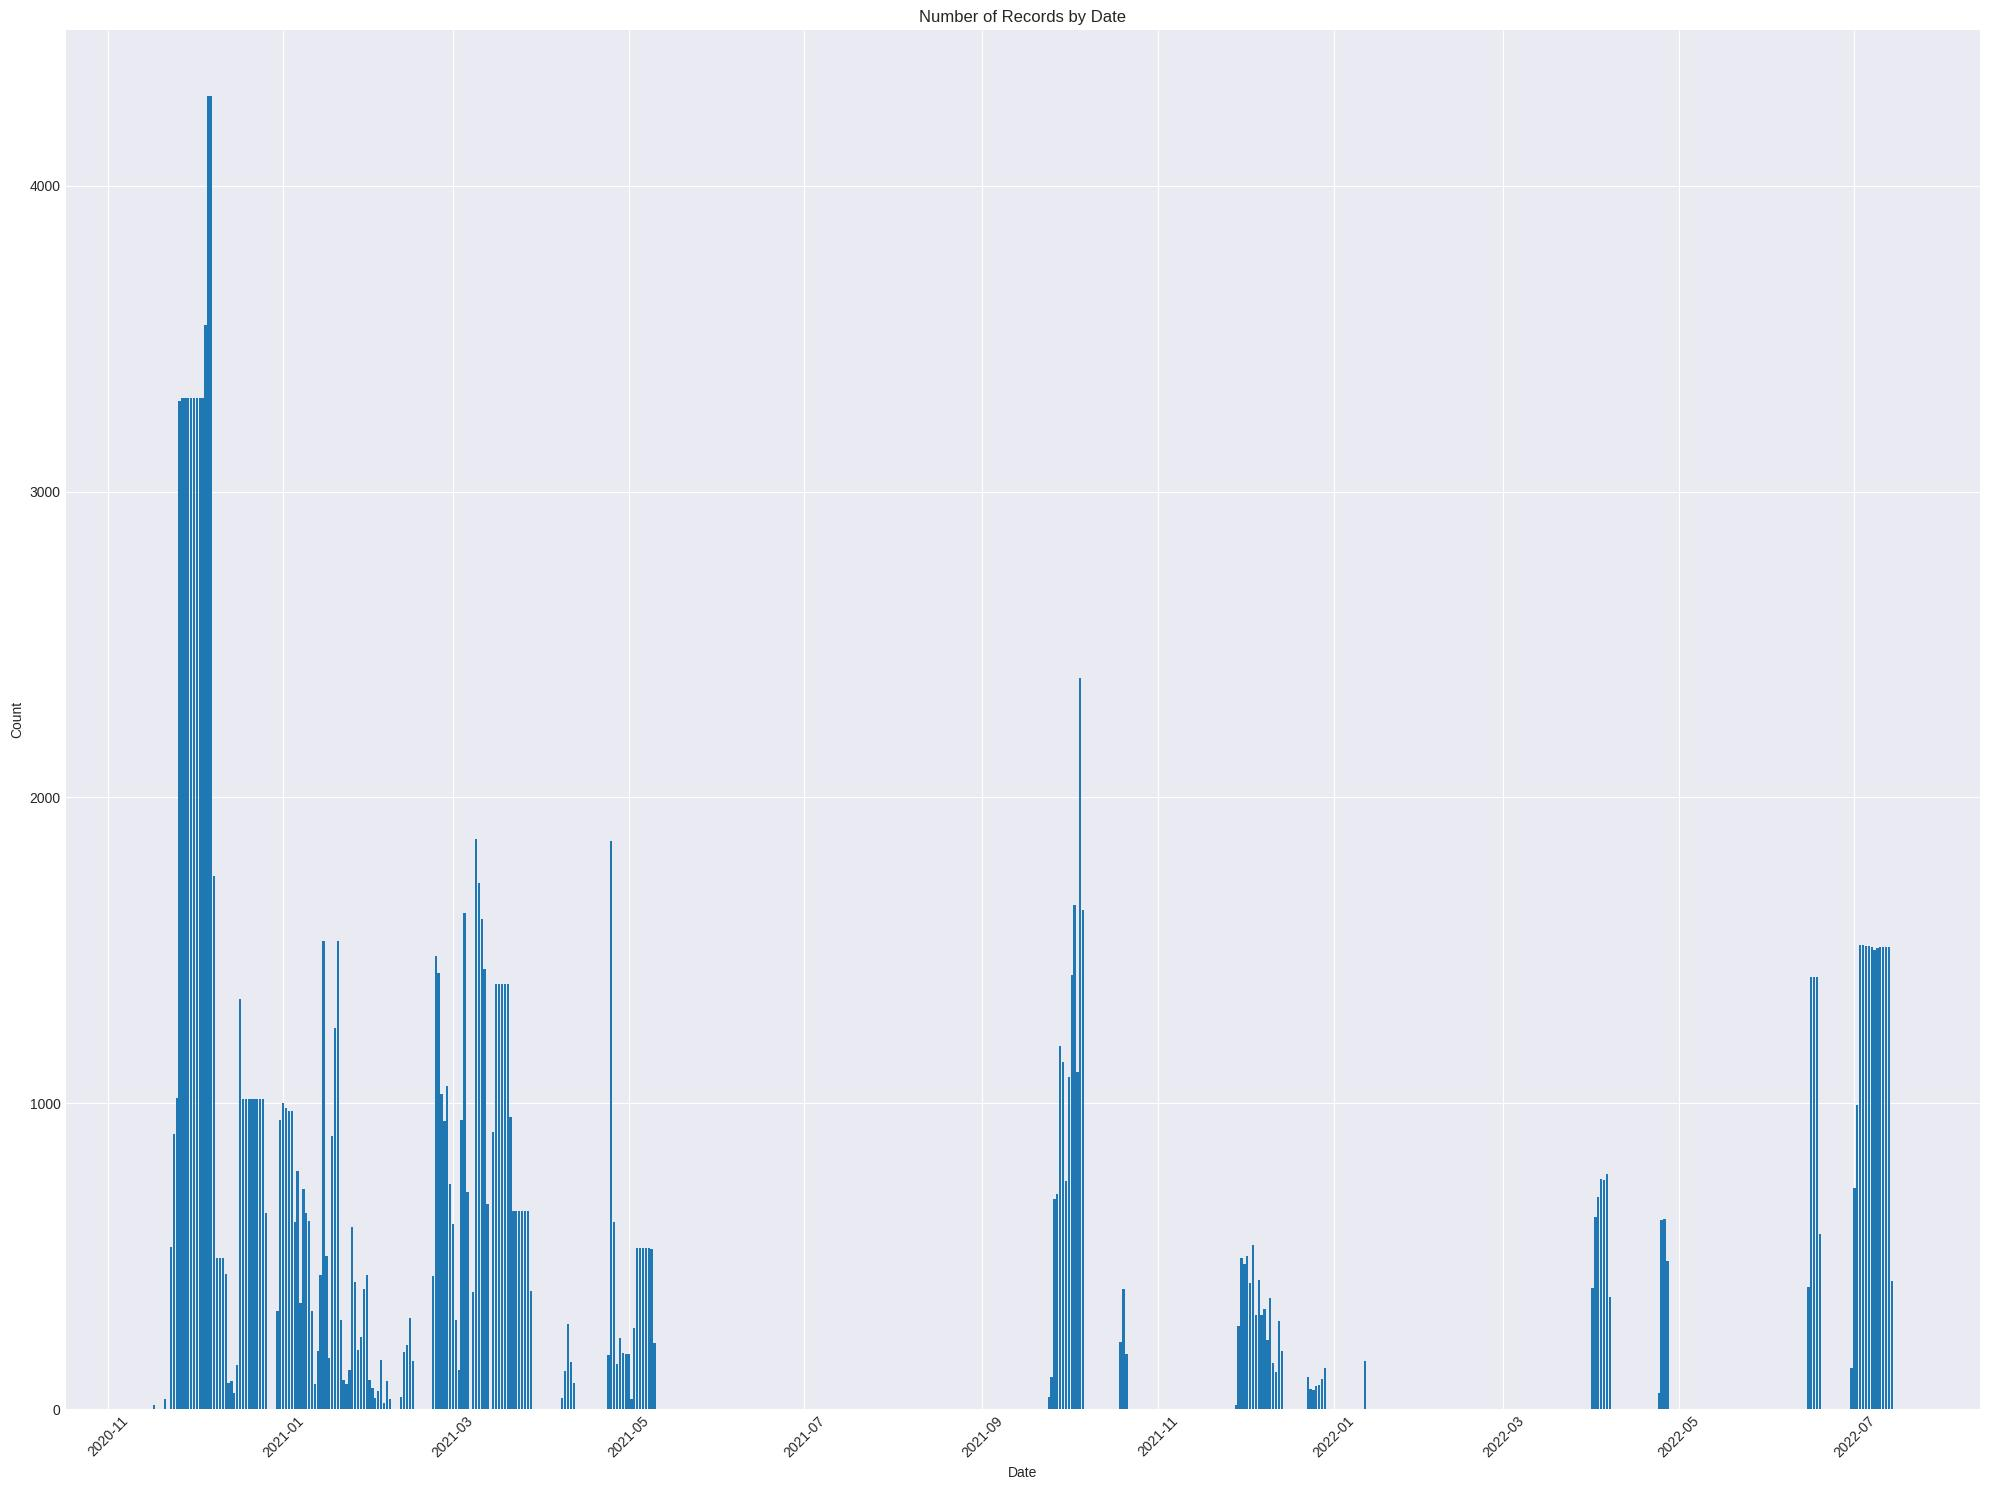

In [13]:
date = df['Date'].dt.date
df_date = date.value_counts().to_frame()
df_date.sort_index(inplace=True)
plt.figure(figsize=(20, 15))
plt.bar(df_date.index, df_date['count'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Records by Date')
plt.tight_layout()
plt.show()

### CO Level

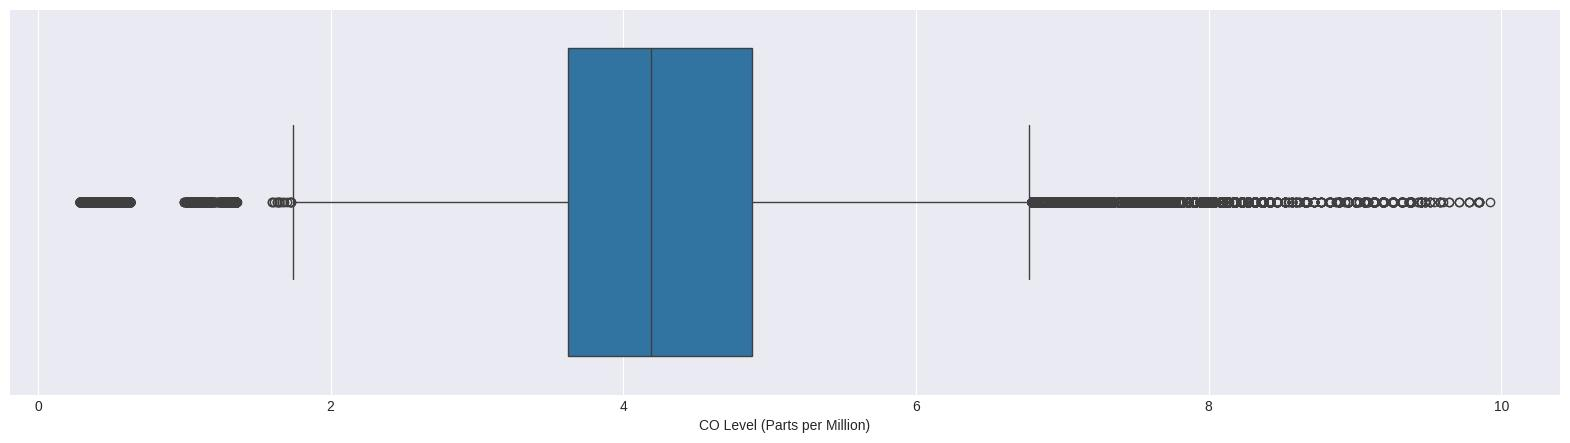

In [14]:
boxplot(df['CO'], xlabel="CO Level (Parts per Million)")

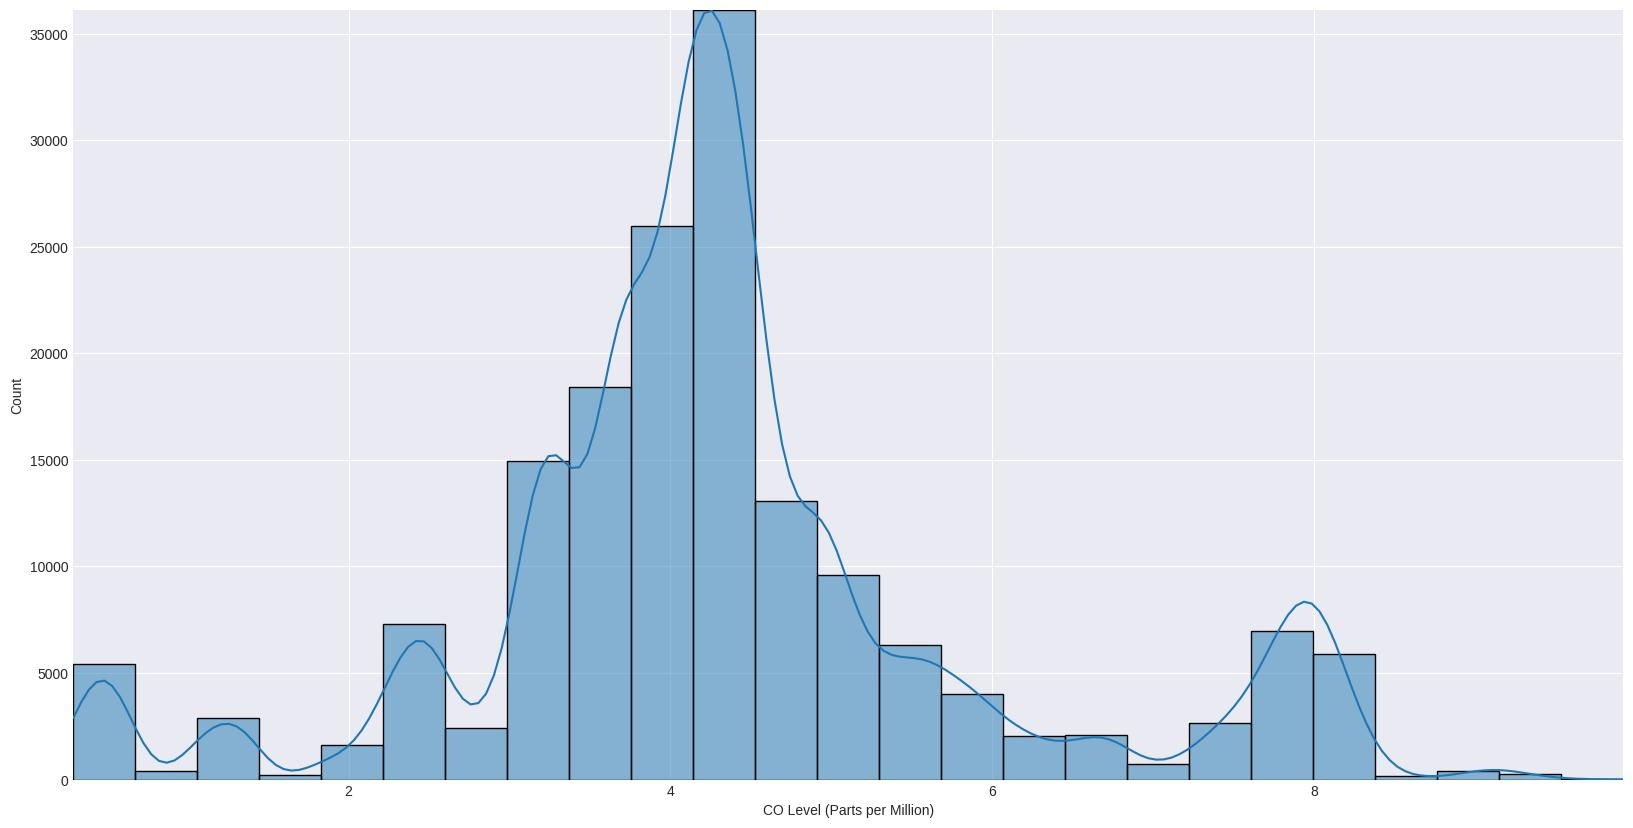

In [15]:
histplot(df['CO'], xlabel="CO Level (Parts per Million)", bins=25, kde=True)

### NO2 Level

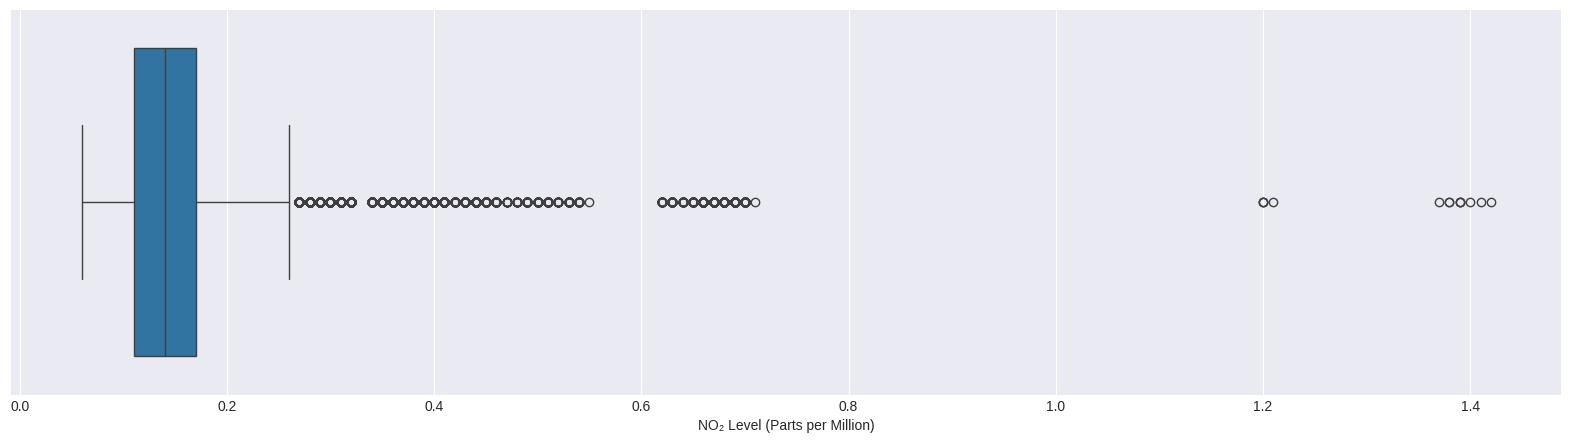

In [16]:
boxplot(df['NO2'], xlabel="NO₂ Level (Parts per Million)")

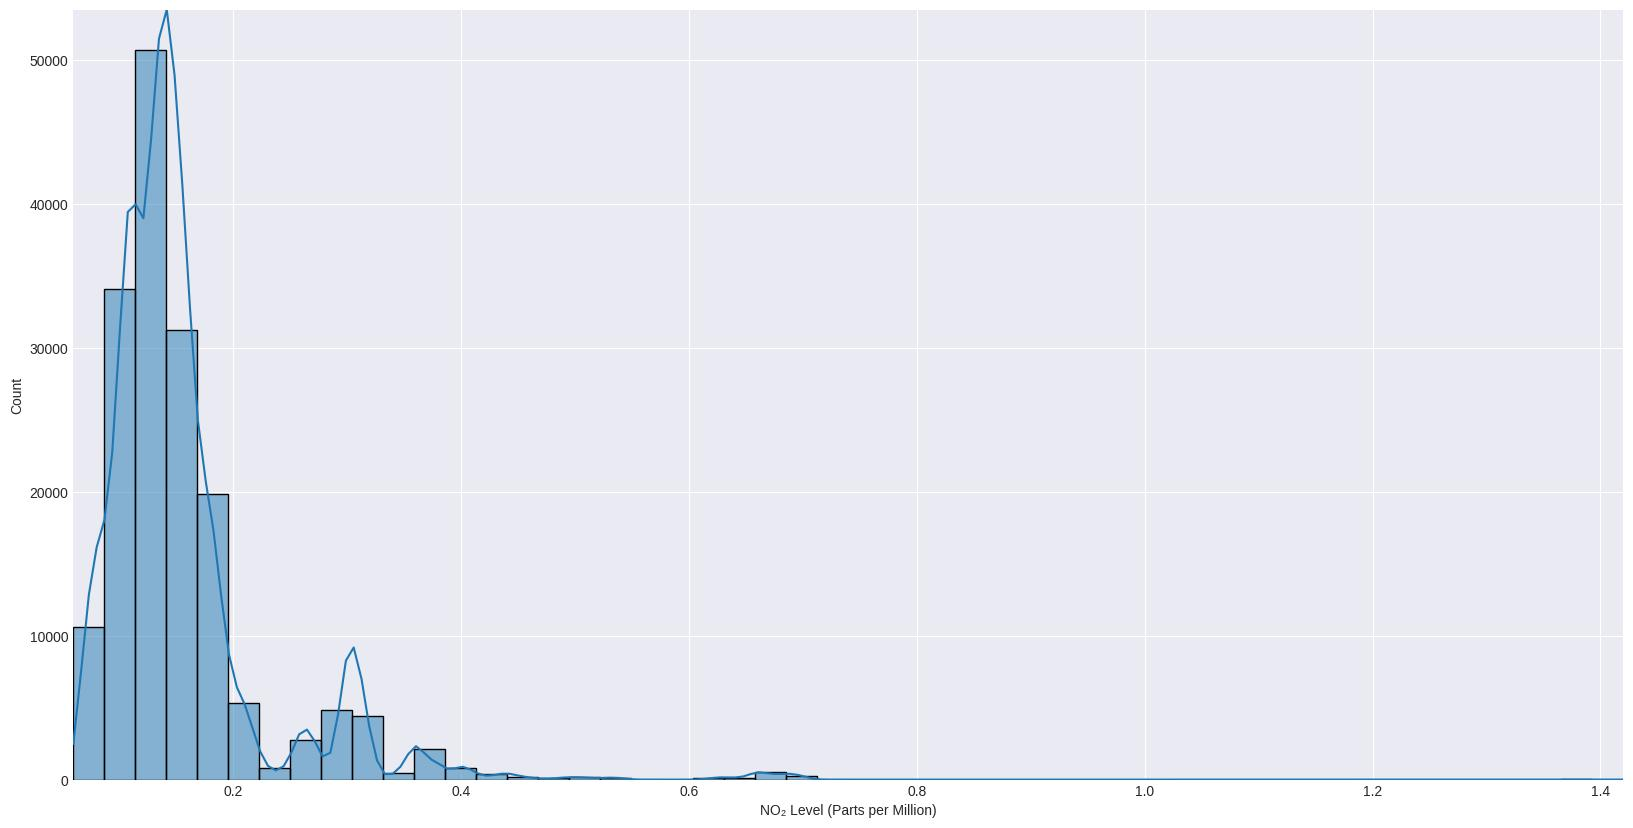

In [17]:
histplot(df['NO2'], xlabel="NO₂ Level (Parts per Million)", bins=50, kde=True)

### Dust Level

In [18]:
df.rename(columns={'PM2.5': 'Dust'}, inplace=True)

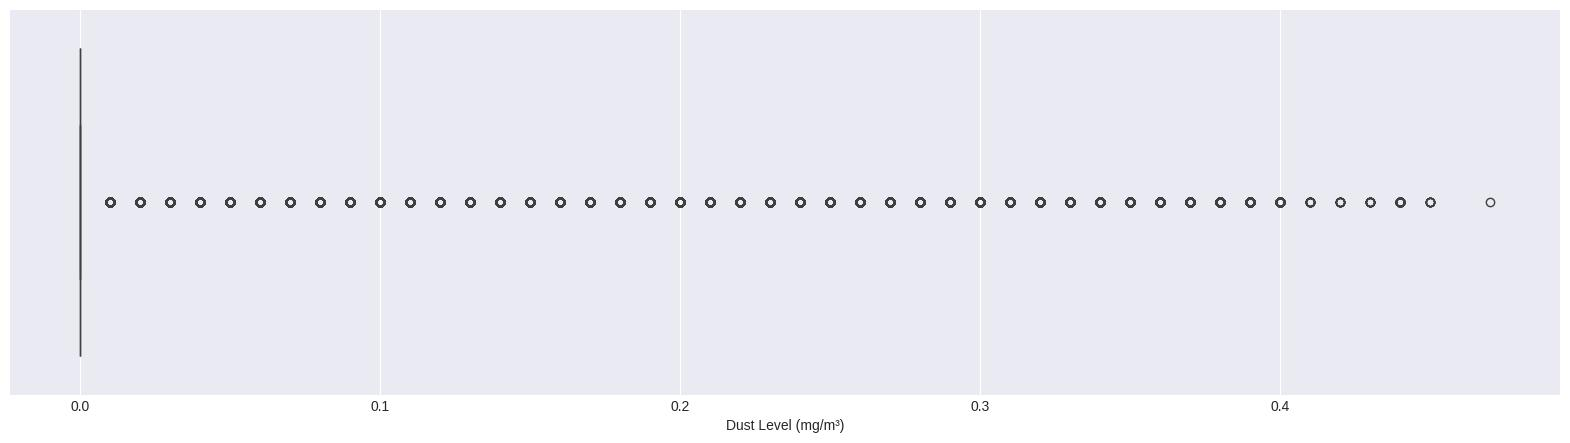

In [19]:
boxplot(df['Dust'], xlabel="Dust Level (mg/m³)")

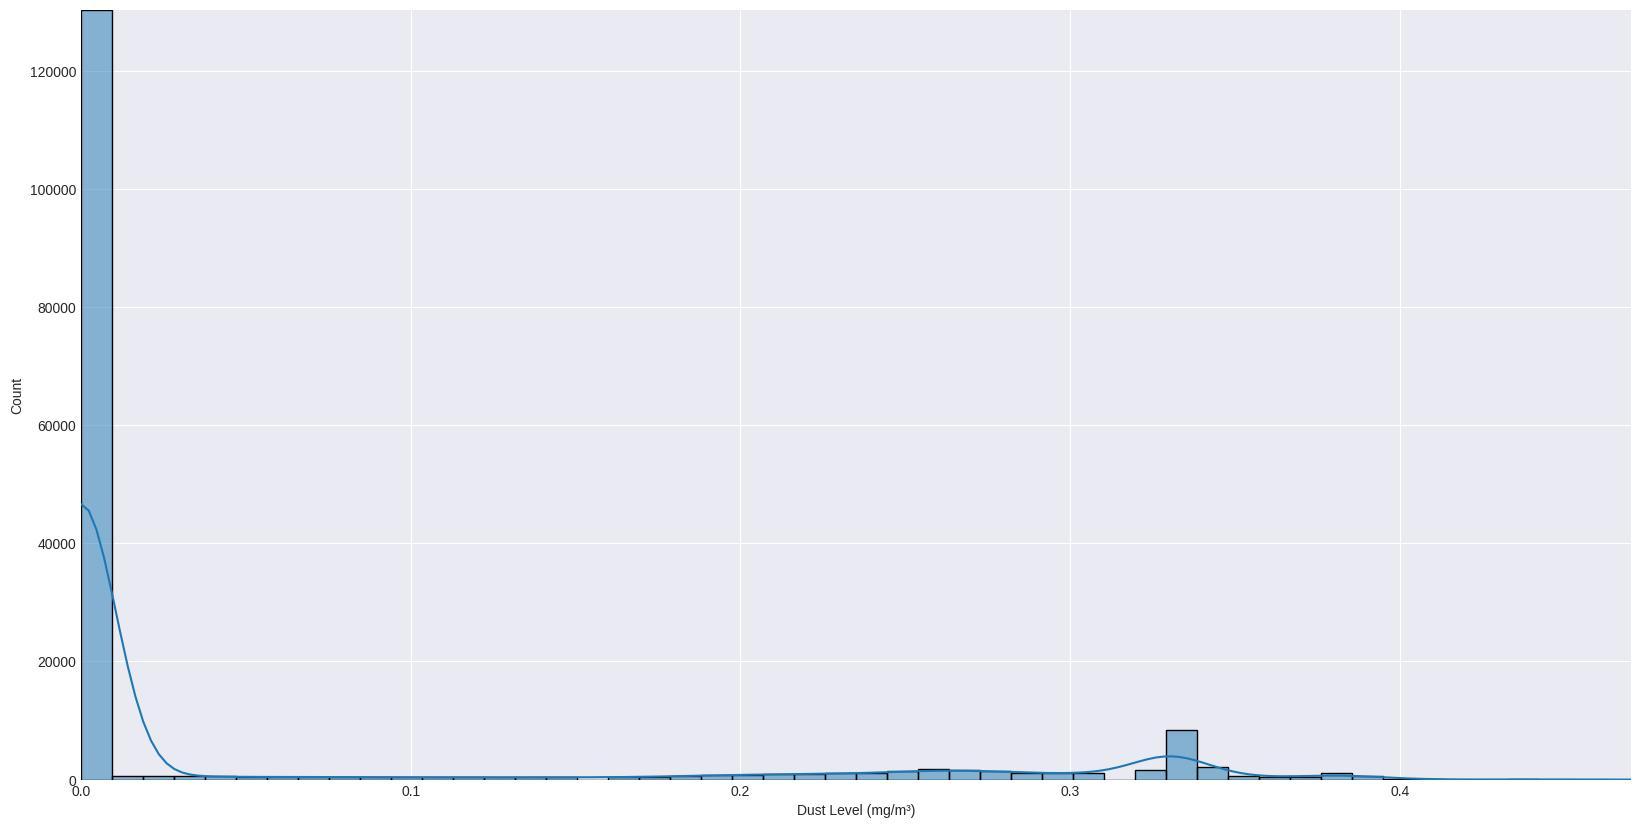

In [20]:
histplot(df['Dust'], xlabel="Dust Level (mg/m³)", bins=50, kde=True)

### NH3 Level

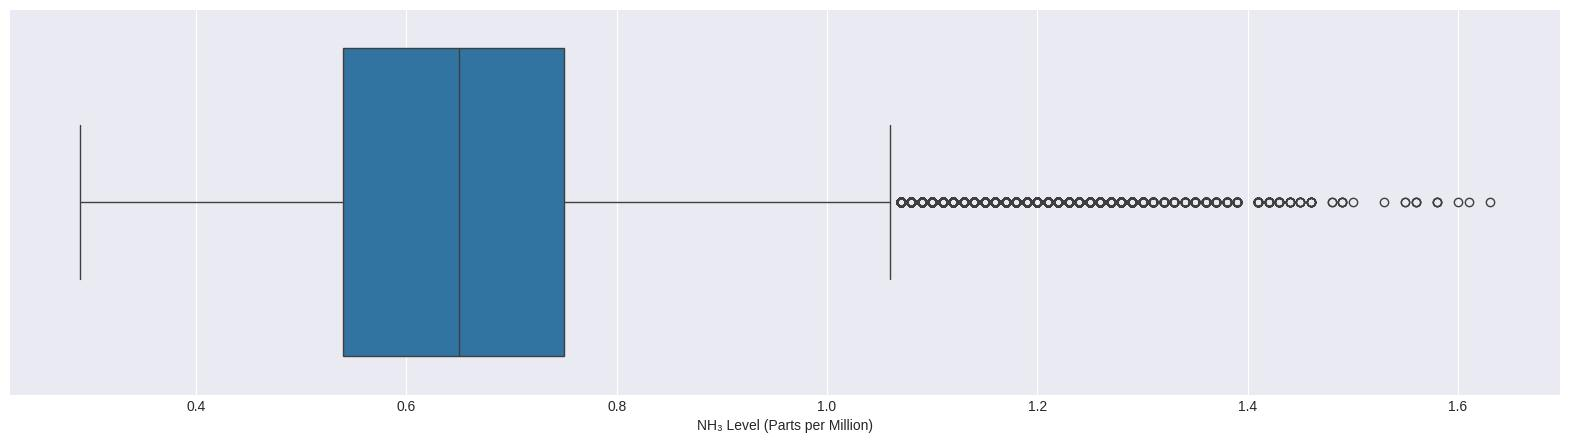

In [21]:
boxplot(df['NH3'], xlabel="NH₃ Level (Parts per Million)")

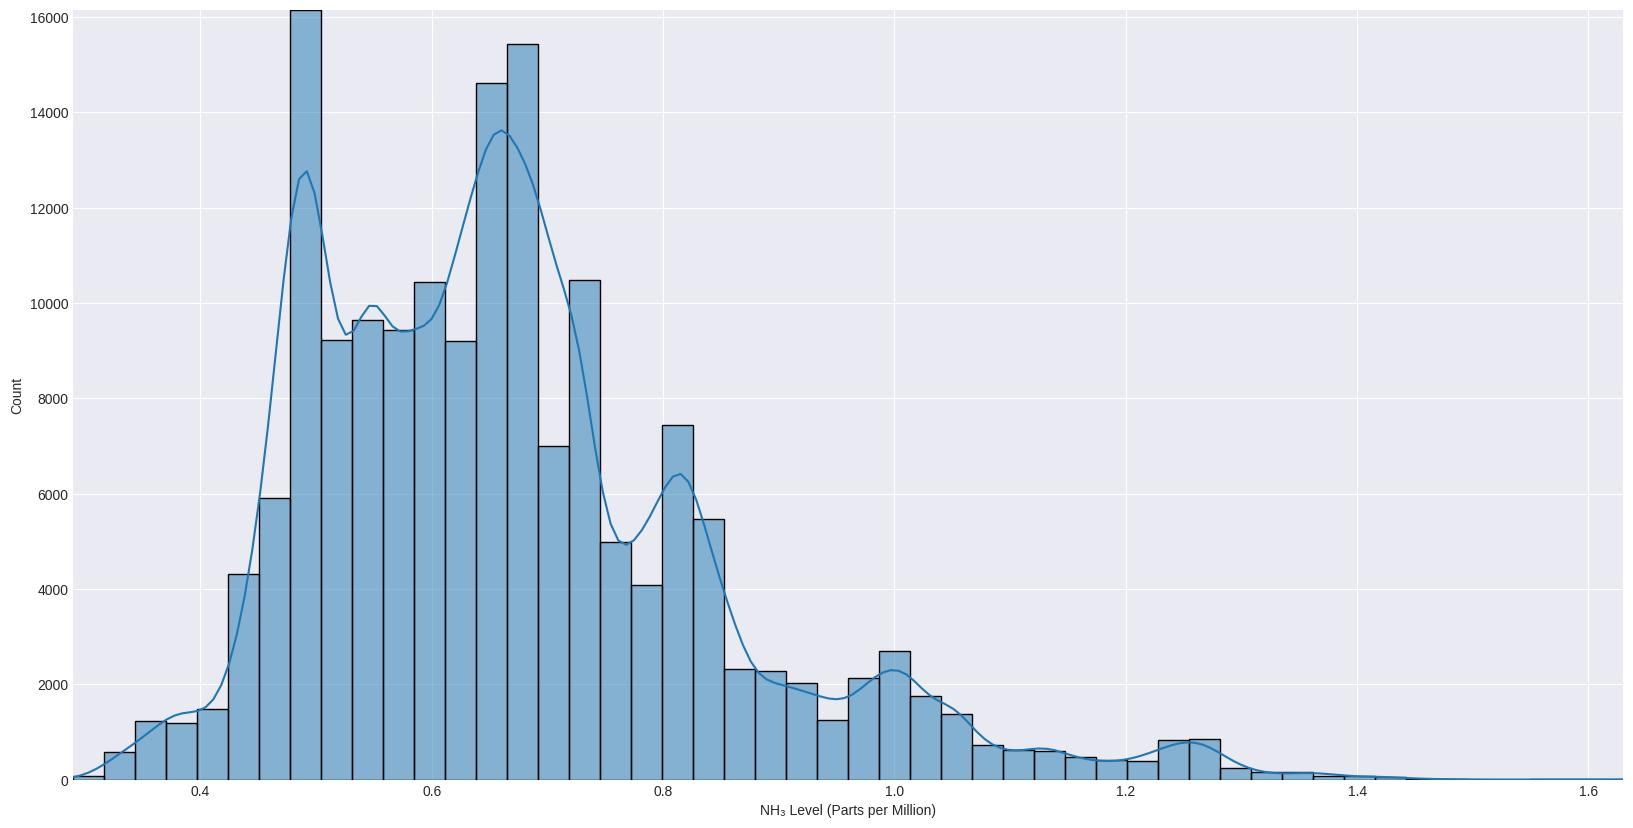

In [22]:
histplot(df['NH3'], xlabel="NH₃ Level (Parts per Million)", bins=50, kde=True)

### Relative Humidity

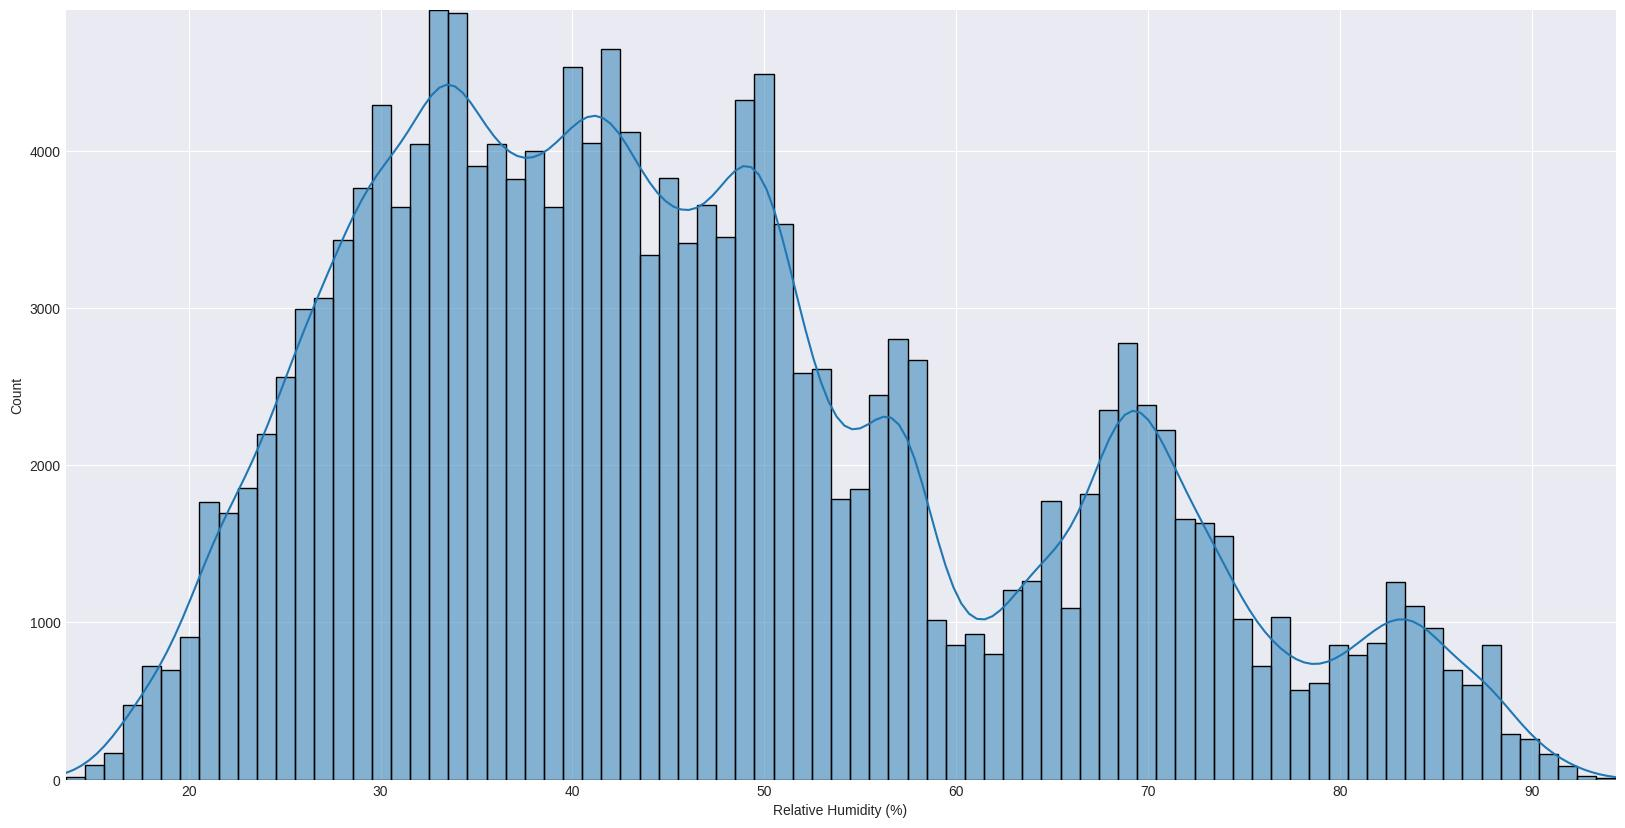

In [23]:
histplot(df['Humidity'], xlabel="Relative Humidity (%)", binwidth=1, kde=True)

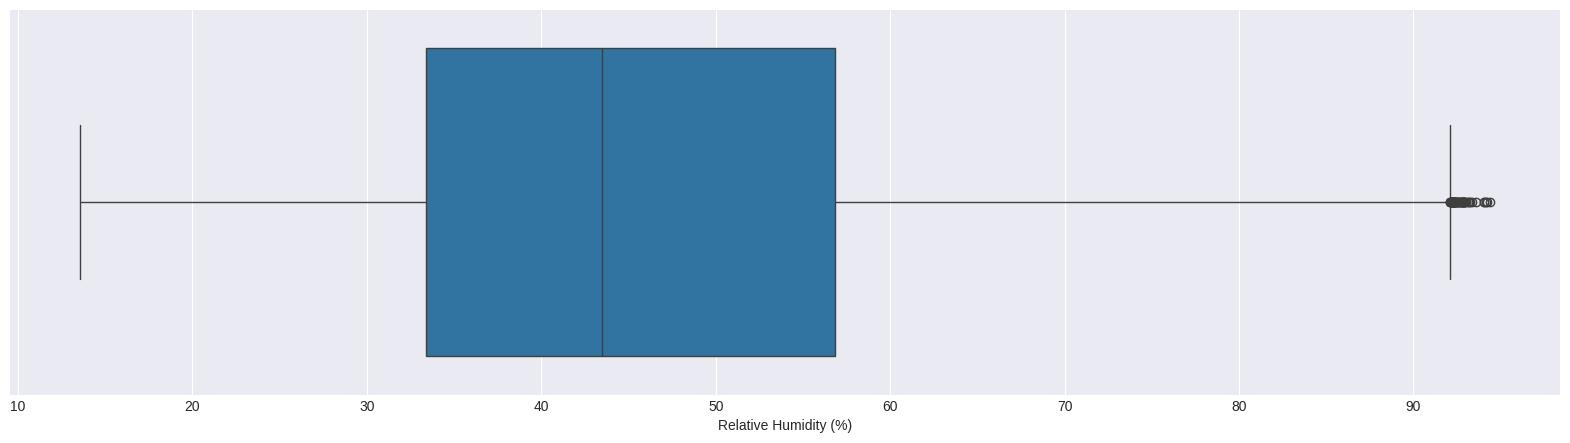

In [24]:
boxplot(df['Humidity'], xlabel="Relative Humidity (%)")

### Temperature

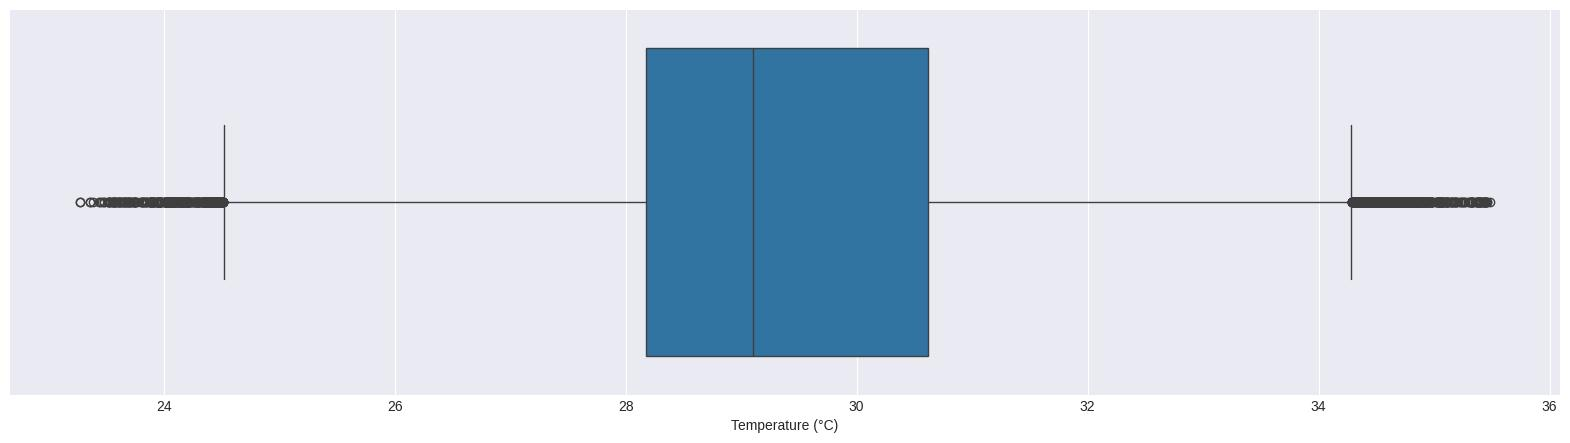

In [25]:
boxplot(df['Temp'], xlabel="Temperature (°C)")

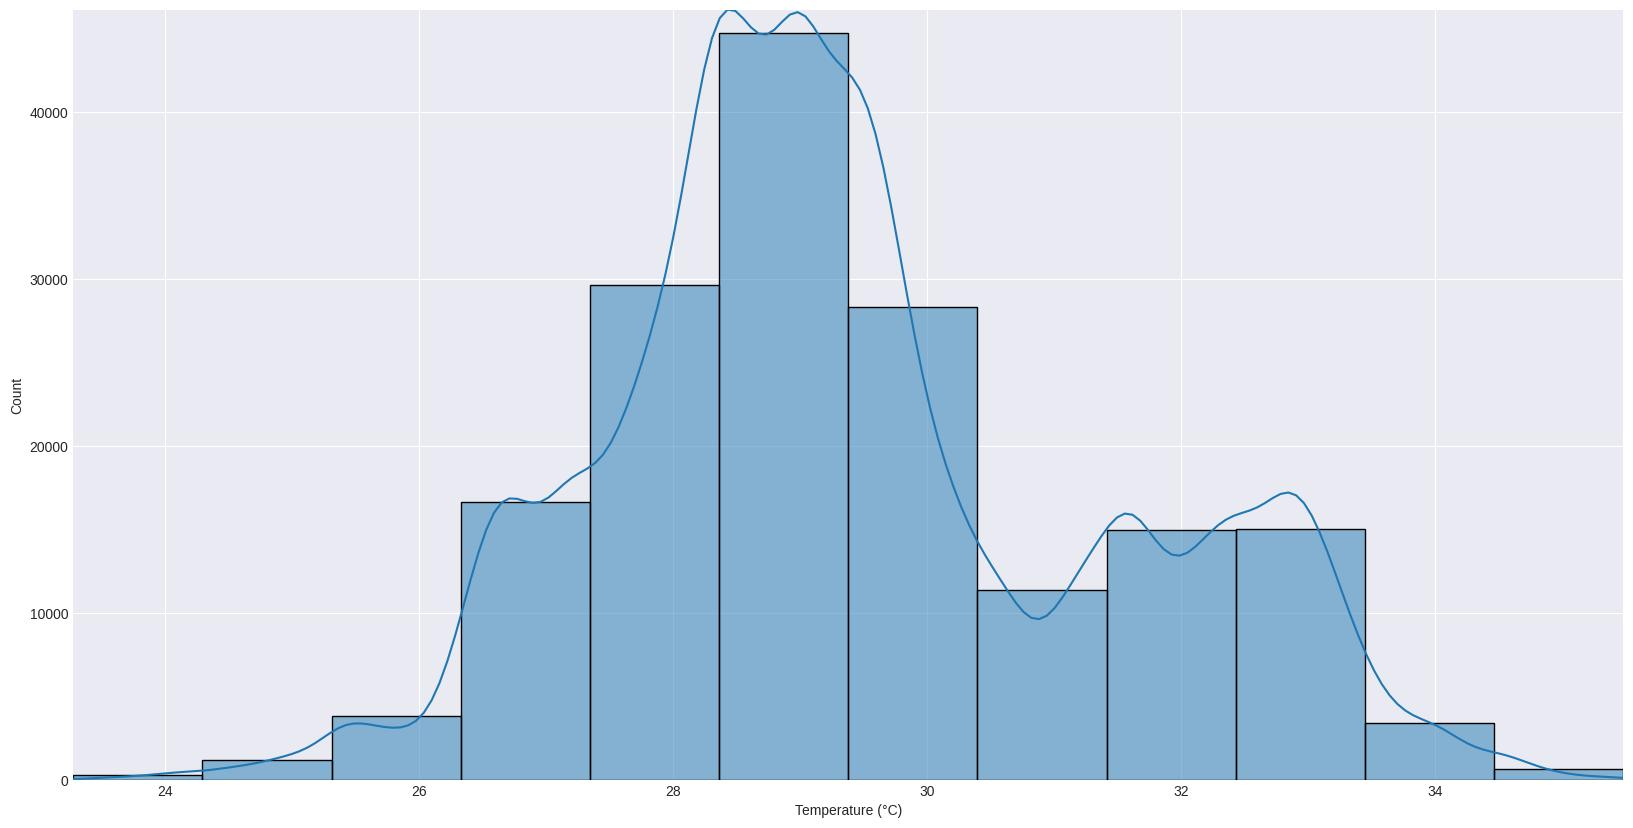

In [26]:
histplot(df['Temp'], xlabel="Temperature (°C)", binwidth=1, kde=True)

### Pressure

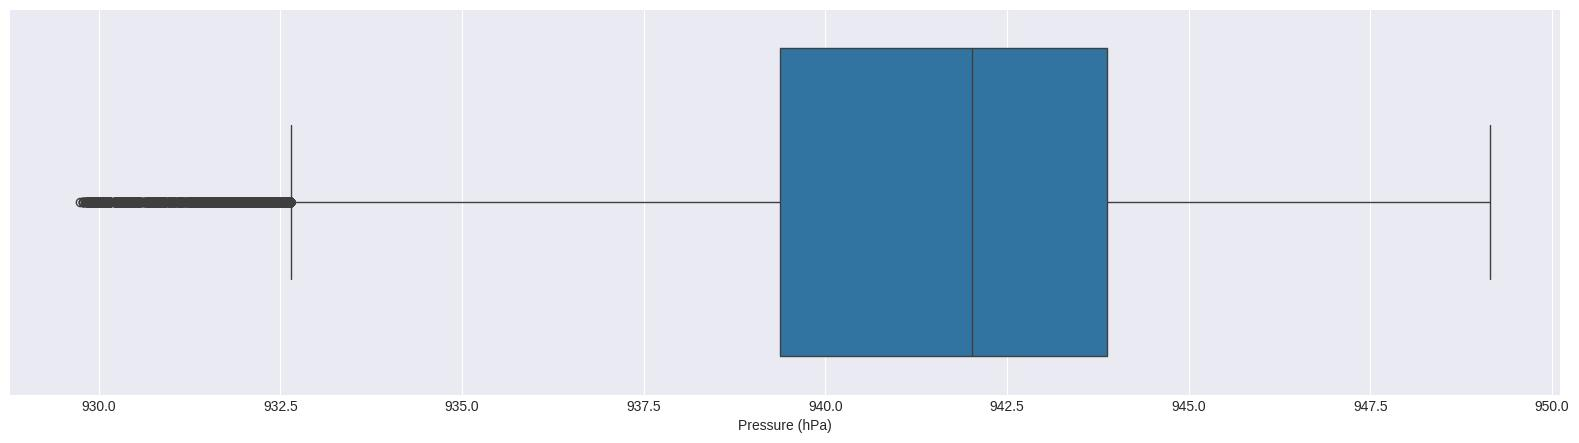

In [27]:
boxplot(df['Pressure'], xlabel="Pressure (hPa)")

### O3

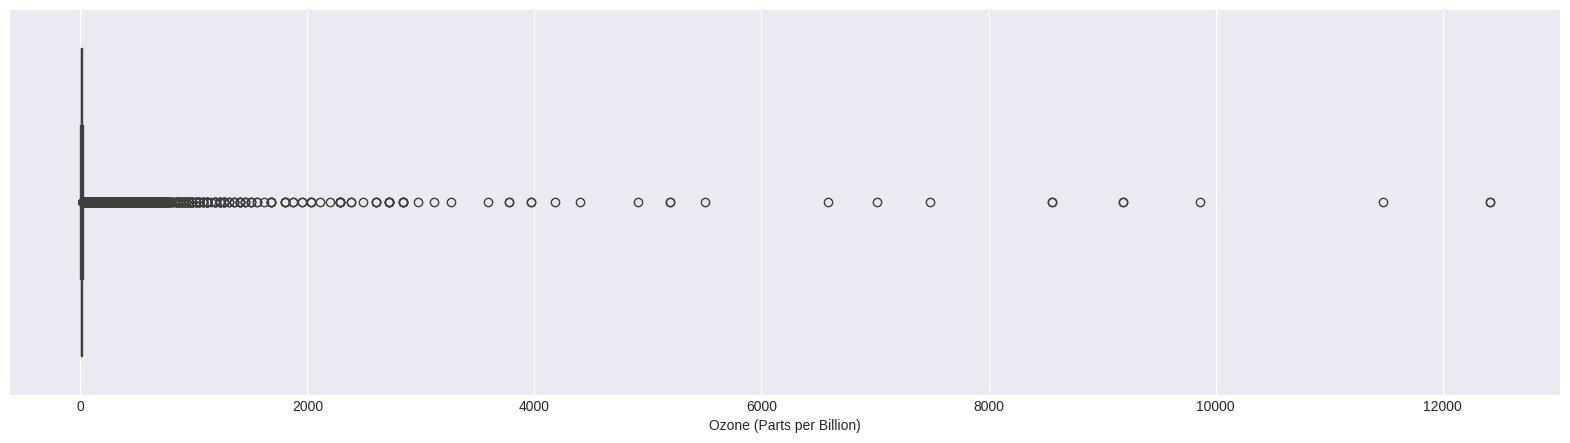

In [28]:
boxplot(df['O3'], xlabel="Ozone (Parts per Billion)")

## Bivariate

In [29]:
df["Time"] = df['Date'].dt.strftime("%H:%M:%S")

### Monthly Averages

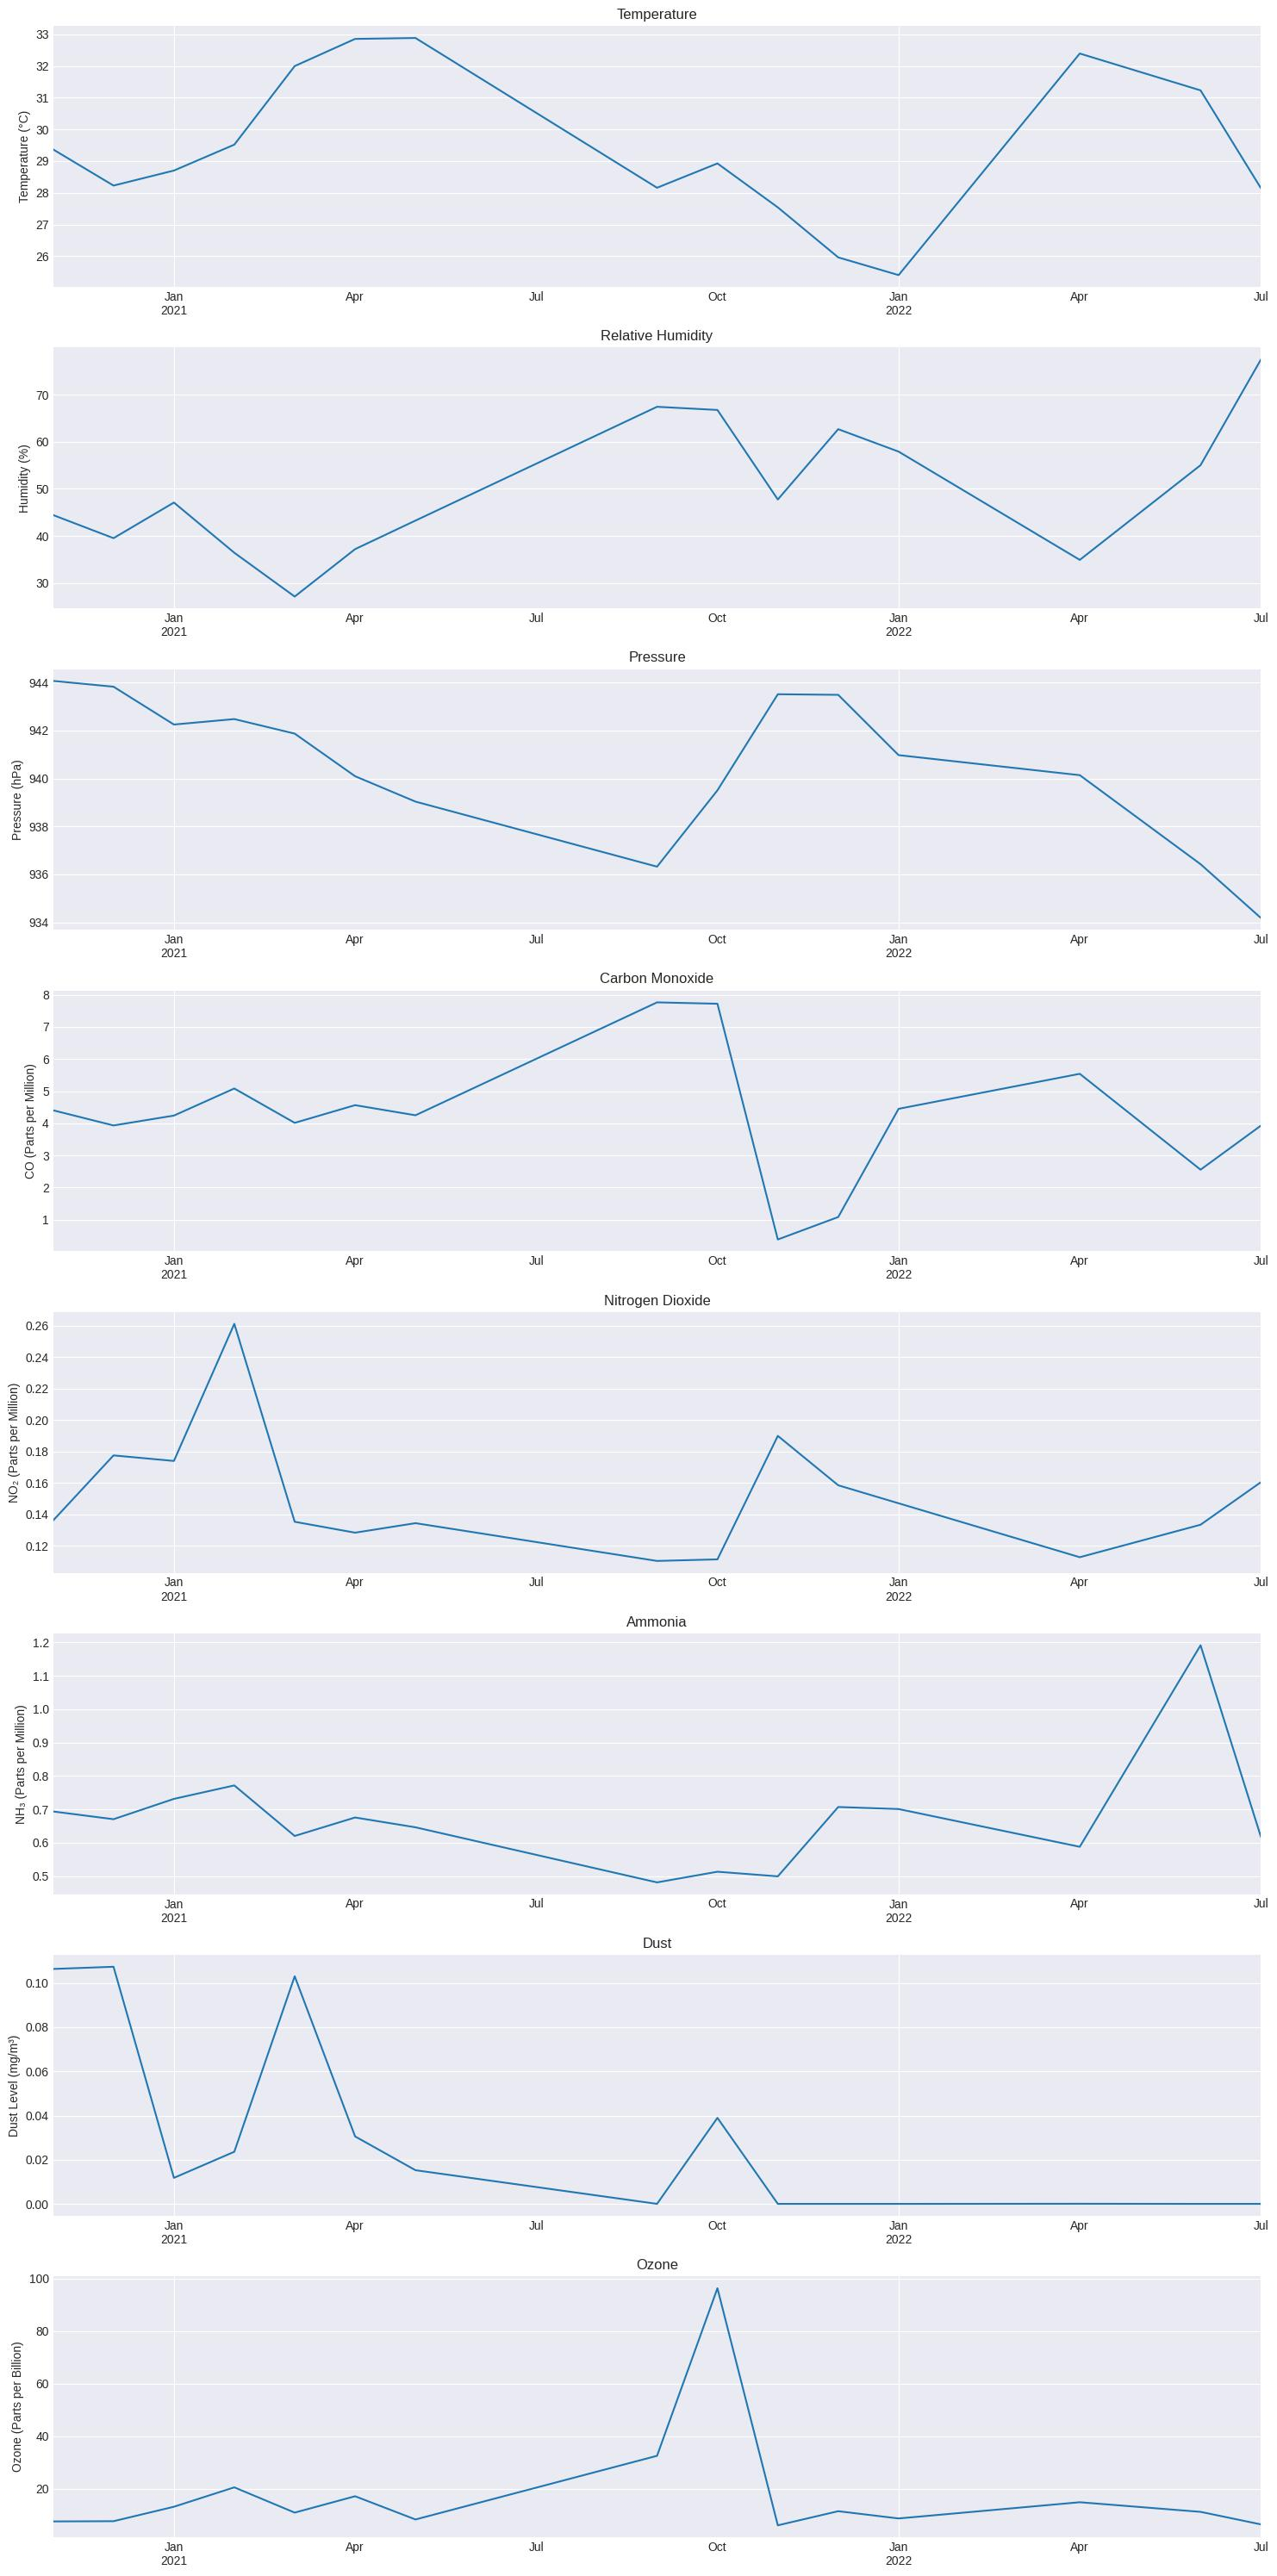

In [30]:
features_to_plot = ['Temp', 'Humidity', 'Pressure', 'CO', 'NO2', 'NH3', 'Dust', 'O3']
titles = ['Temperature', 'Relative Humidity', 'Pressure', 'Carbon Monoxide', 'Nitrogen Dioxide', 'Ammonia', 'Dust', 'Ozone']
labels = ['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'CO (Parts per Million)', 'NO₂ (Parts per Million)', 'NH₃ (Parts per Million)', 'Dust Level (mg/m³)', 'Ozone (Parts per Billion)']

monthly = df.groupby(df['Date'].dt.to_period('M'))
average_temp = monthly['Temp'].mean()
average_humidity = monthly['Humidity'].mean()
average_no2 = monthly['NO2'].mean()
average_co = monthly['CO'].mean()

fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(15, 20 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    data = monthly[feature].mean()
    data.plot(figsize=(15, 30), ax=axes[i], title=titles[i], ylabel=labels[i], xlabel="")

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined image with separate scatter plots
plt.show()

### Scatter Plots

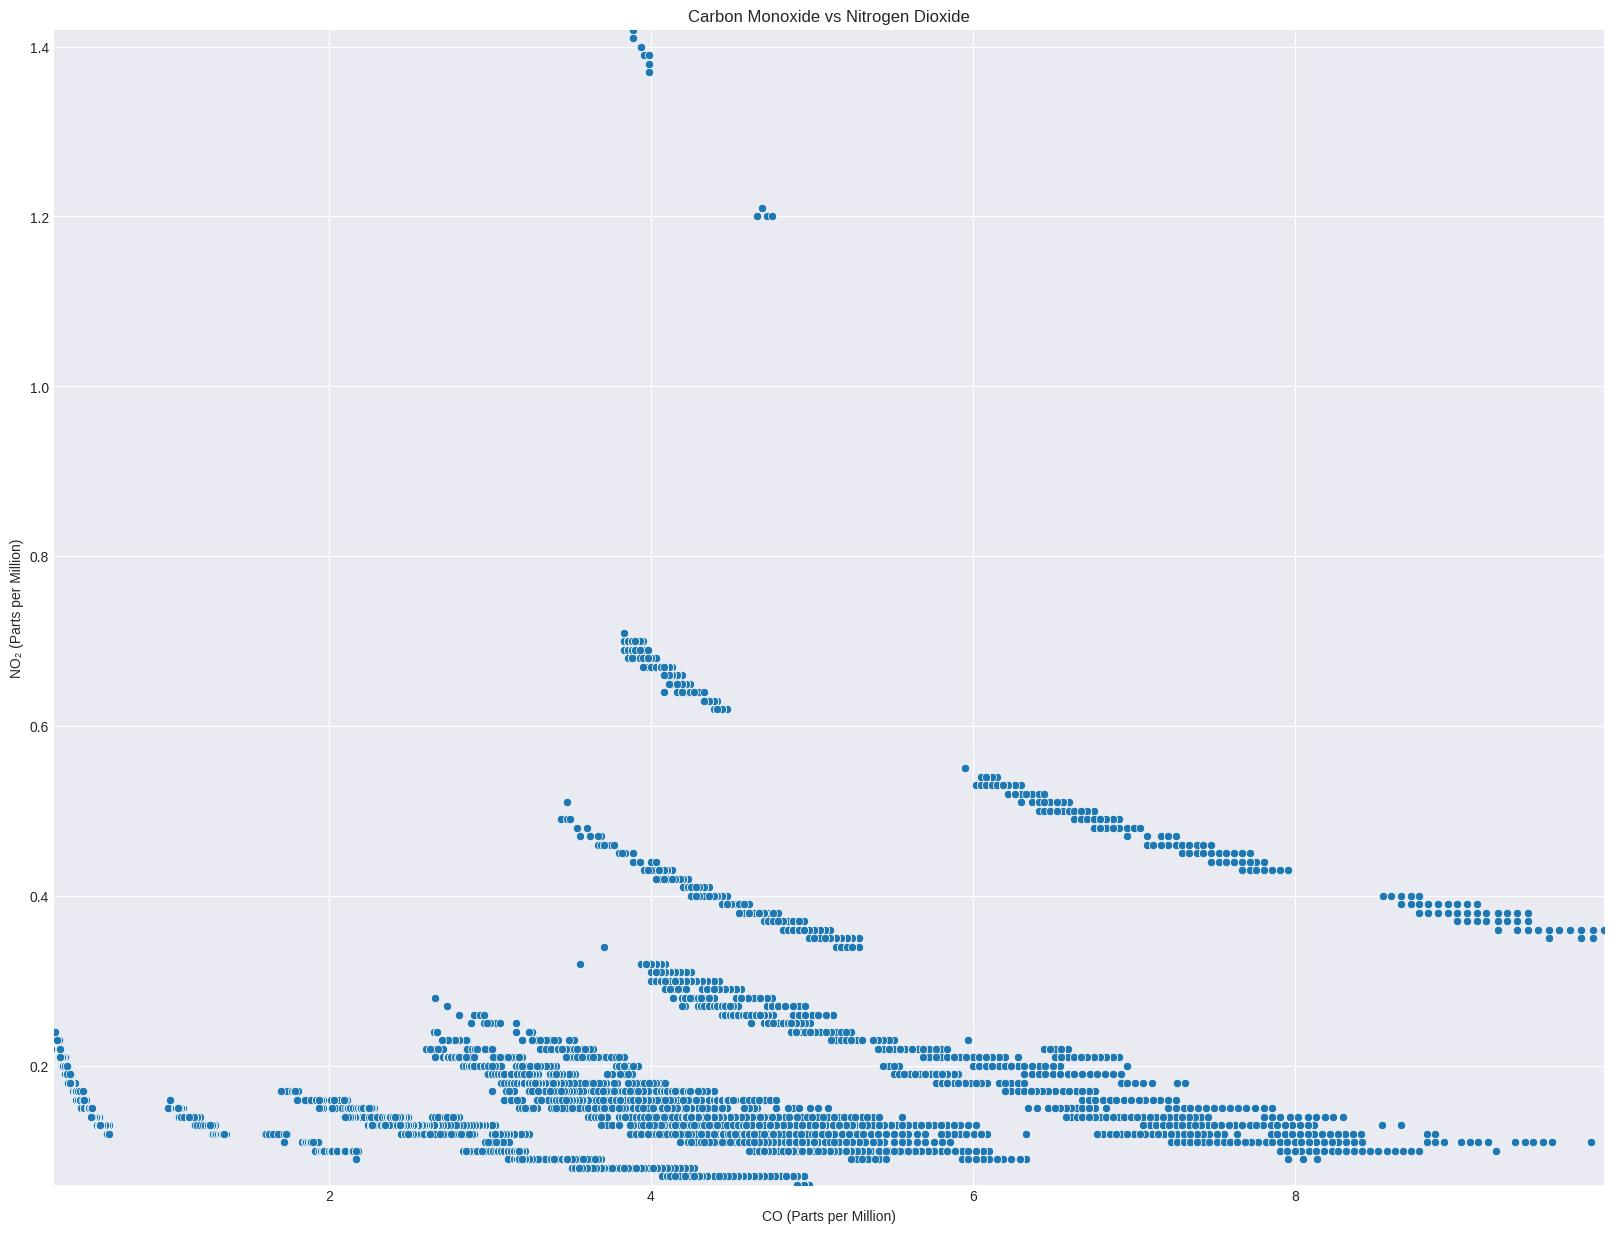

In [31]:
scatterplot(df['CO'], df['NO2'], xlabel="CO (Parts per Million)", ylabel="NO₂ (Parts per Million)", title="Carbon Monoxide vs Nitrogen Dioxide")

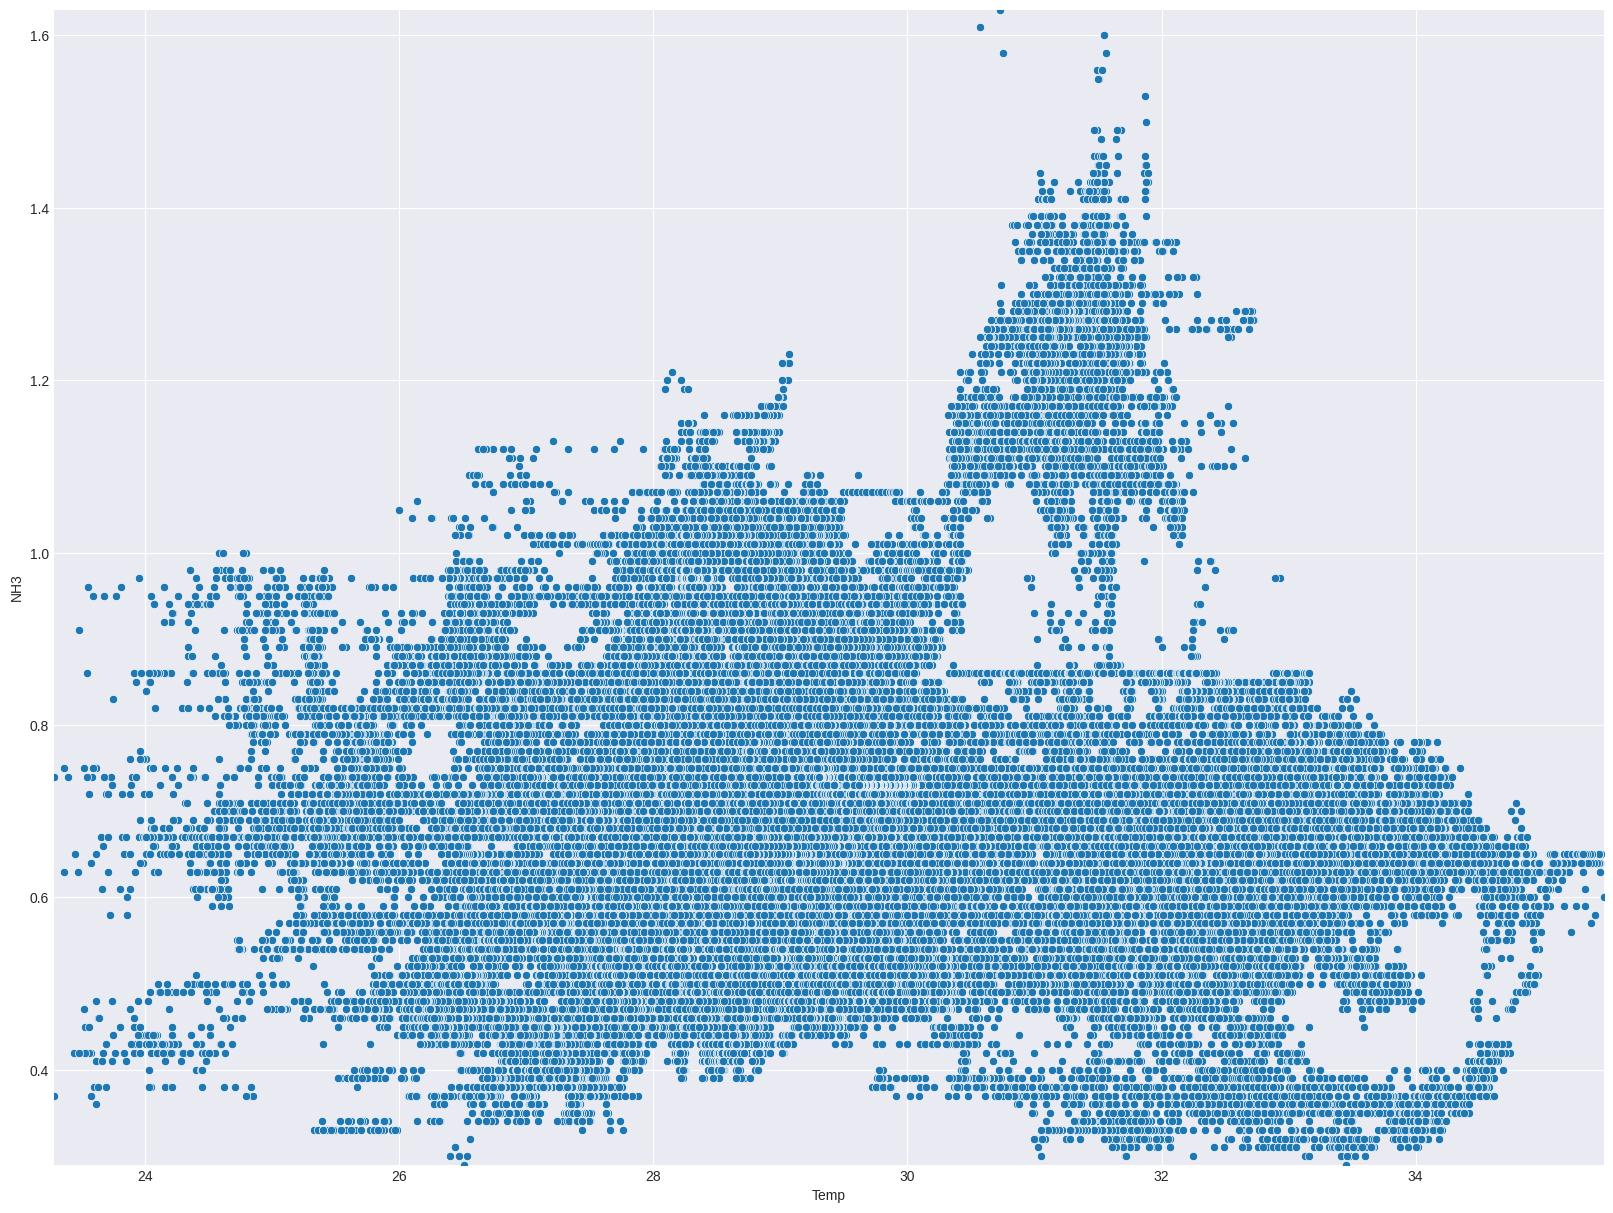

In [32]:
scatterplot(df['Temp'], df['NH3'])

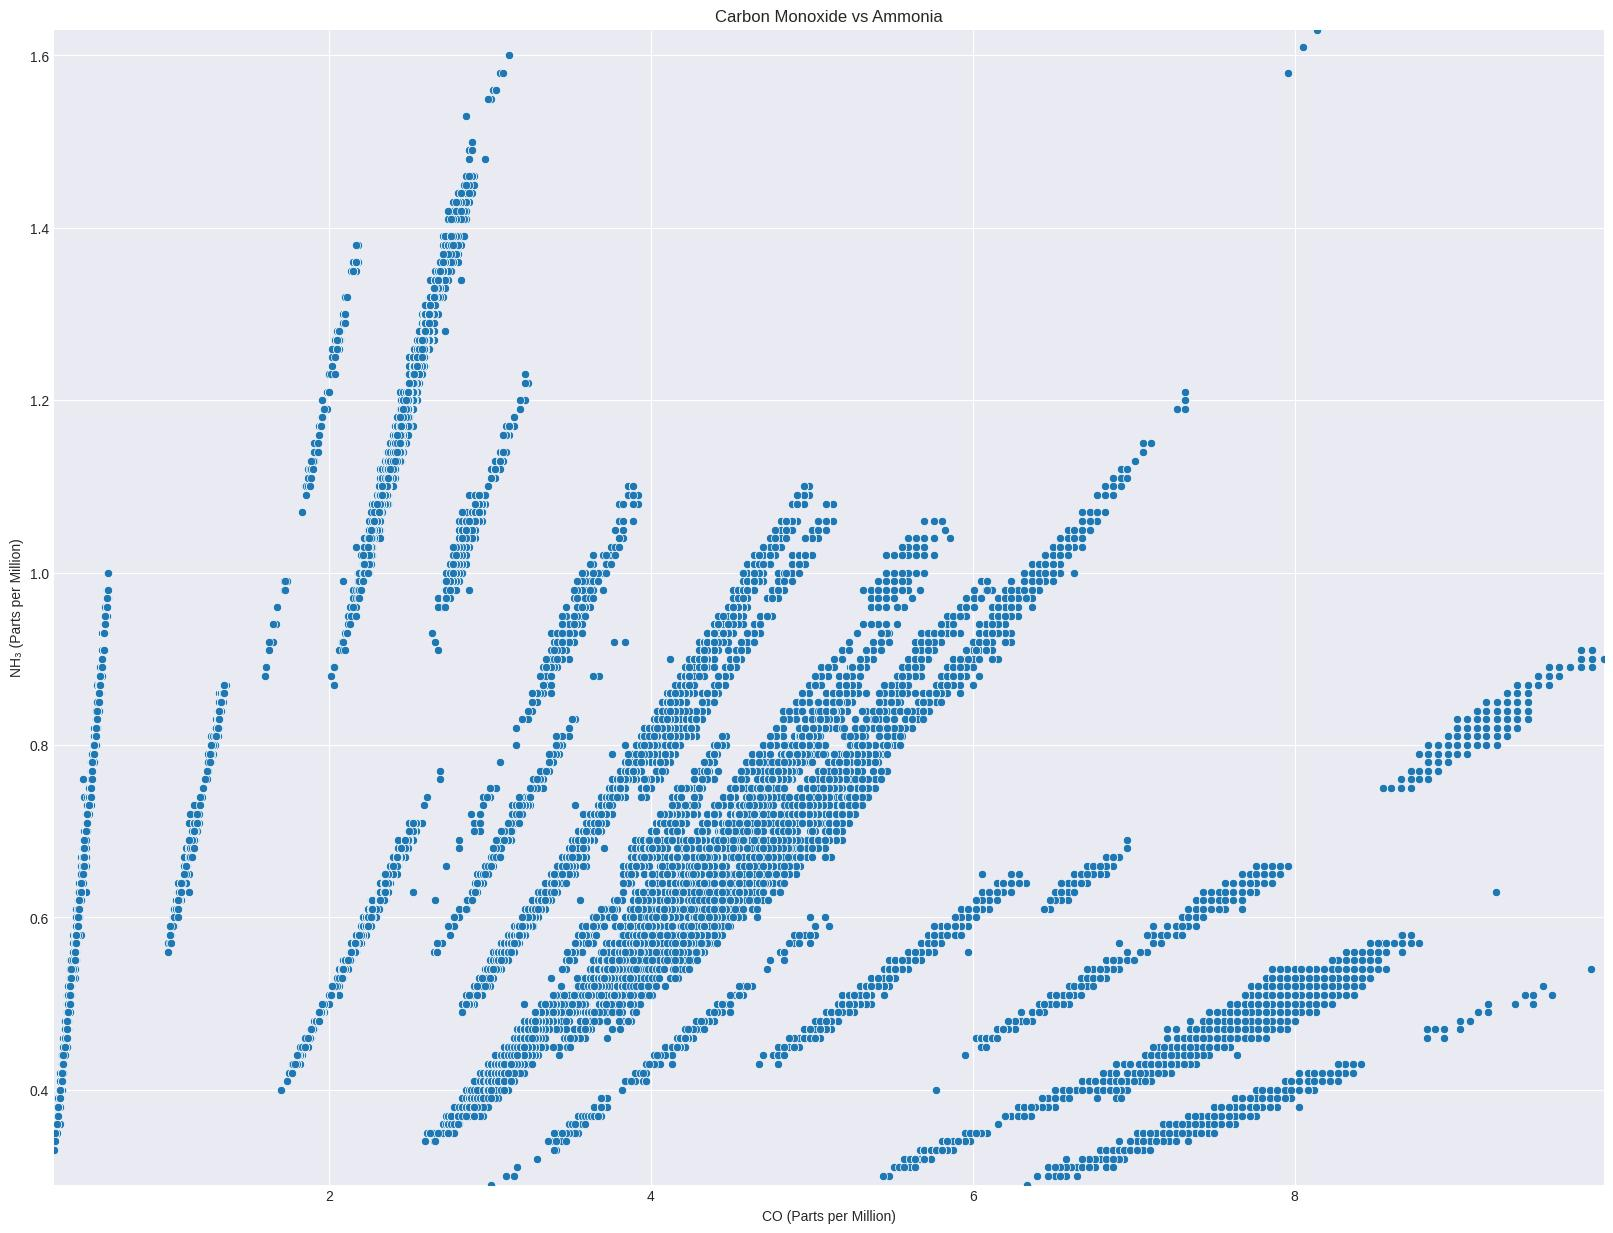

In [34]:
scatterplot(df['CO'], df['NH3'], xlabel="CO (Parts per Million)", ylabel="NH₃ (Parts per Million)", title="Carbon Monoxide vs Ammonia")

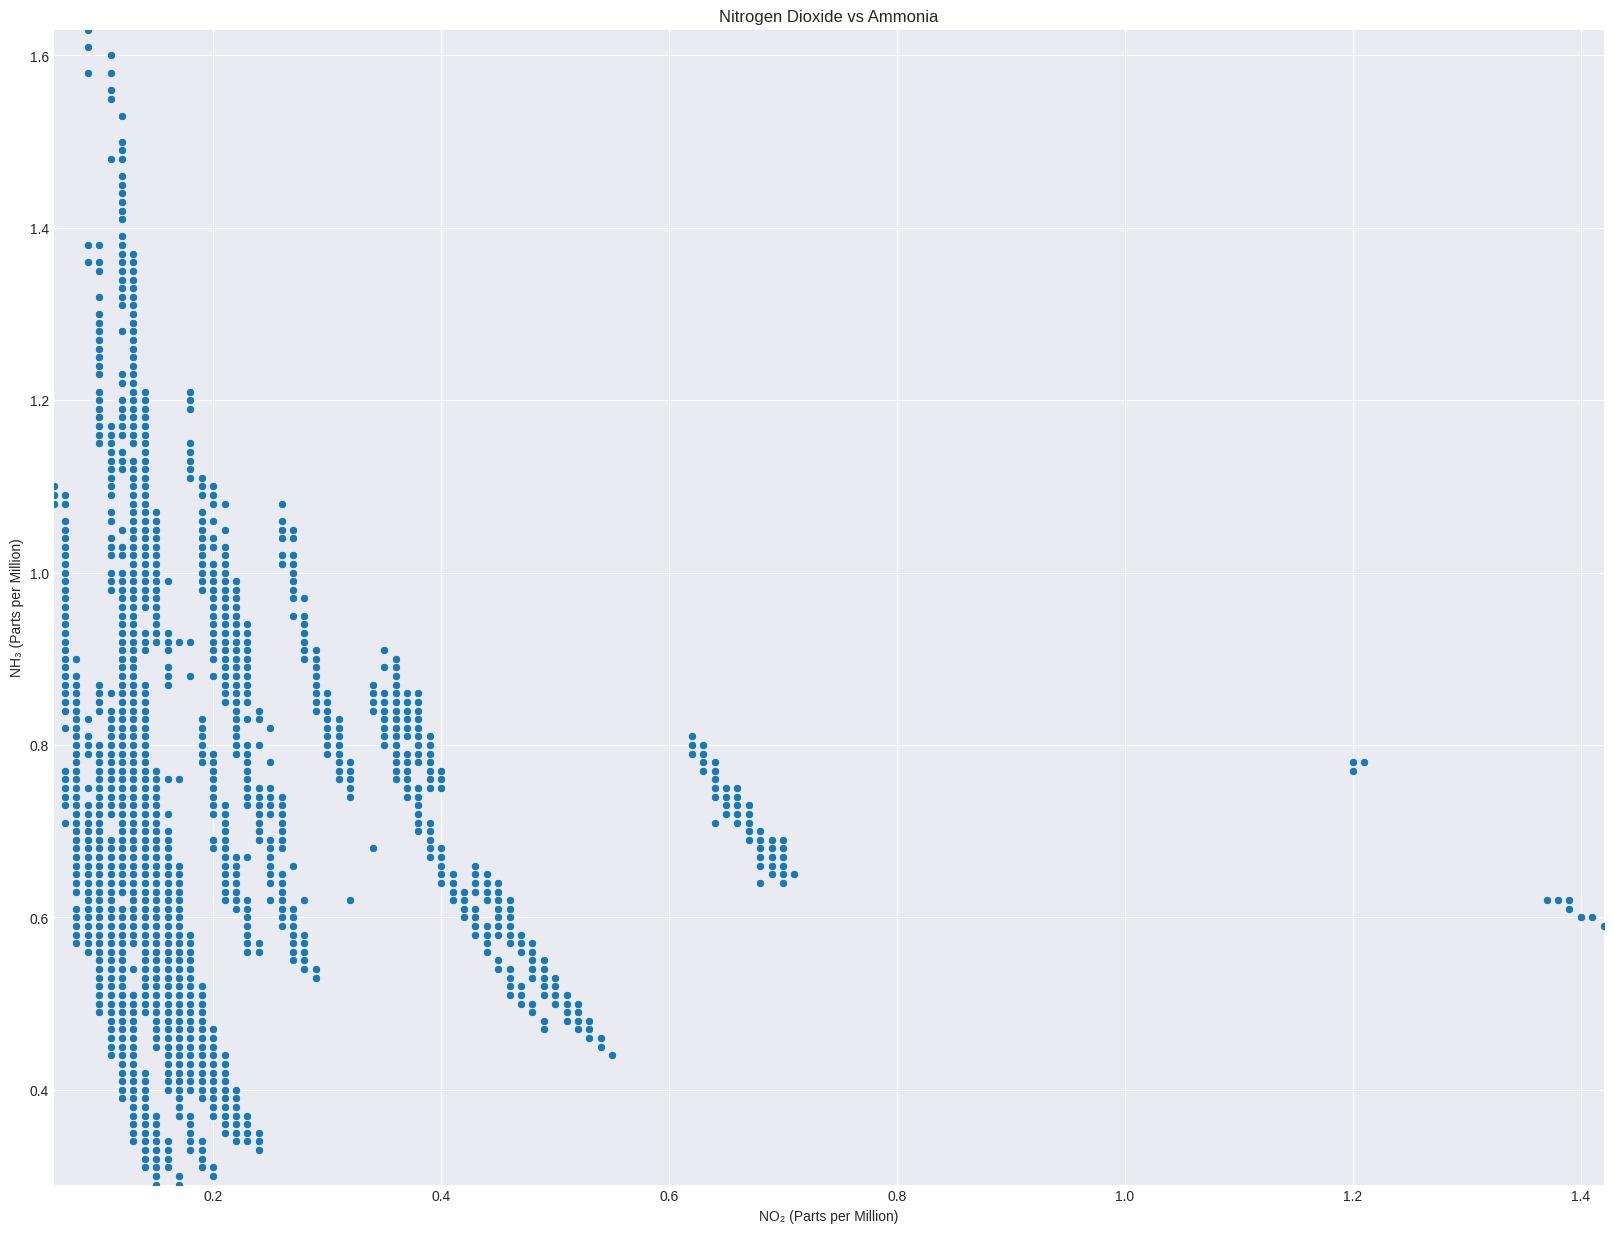

In [35]:
scatterplot(df['NO2'], df['NH3'], xlabel="NO₂ (Parts per Million)", ylabel="NH₃ (Parts per Million)", title="Nitrogen Dioxide vs Ammonia")

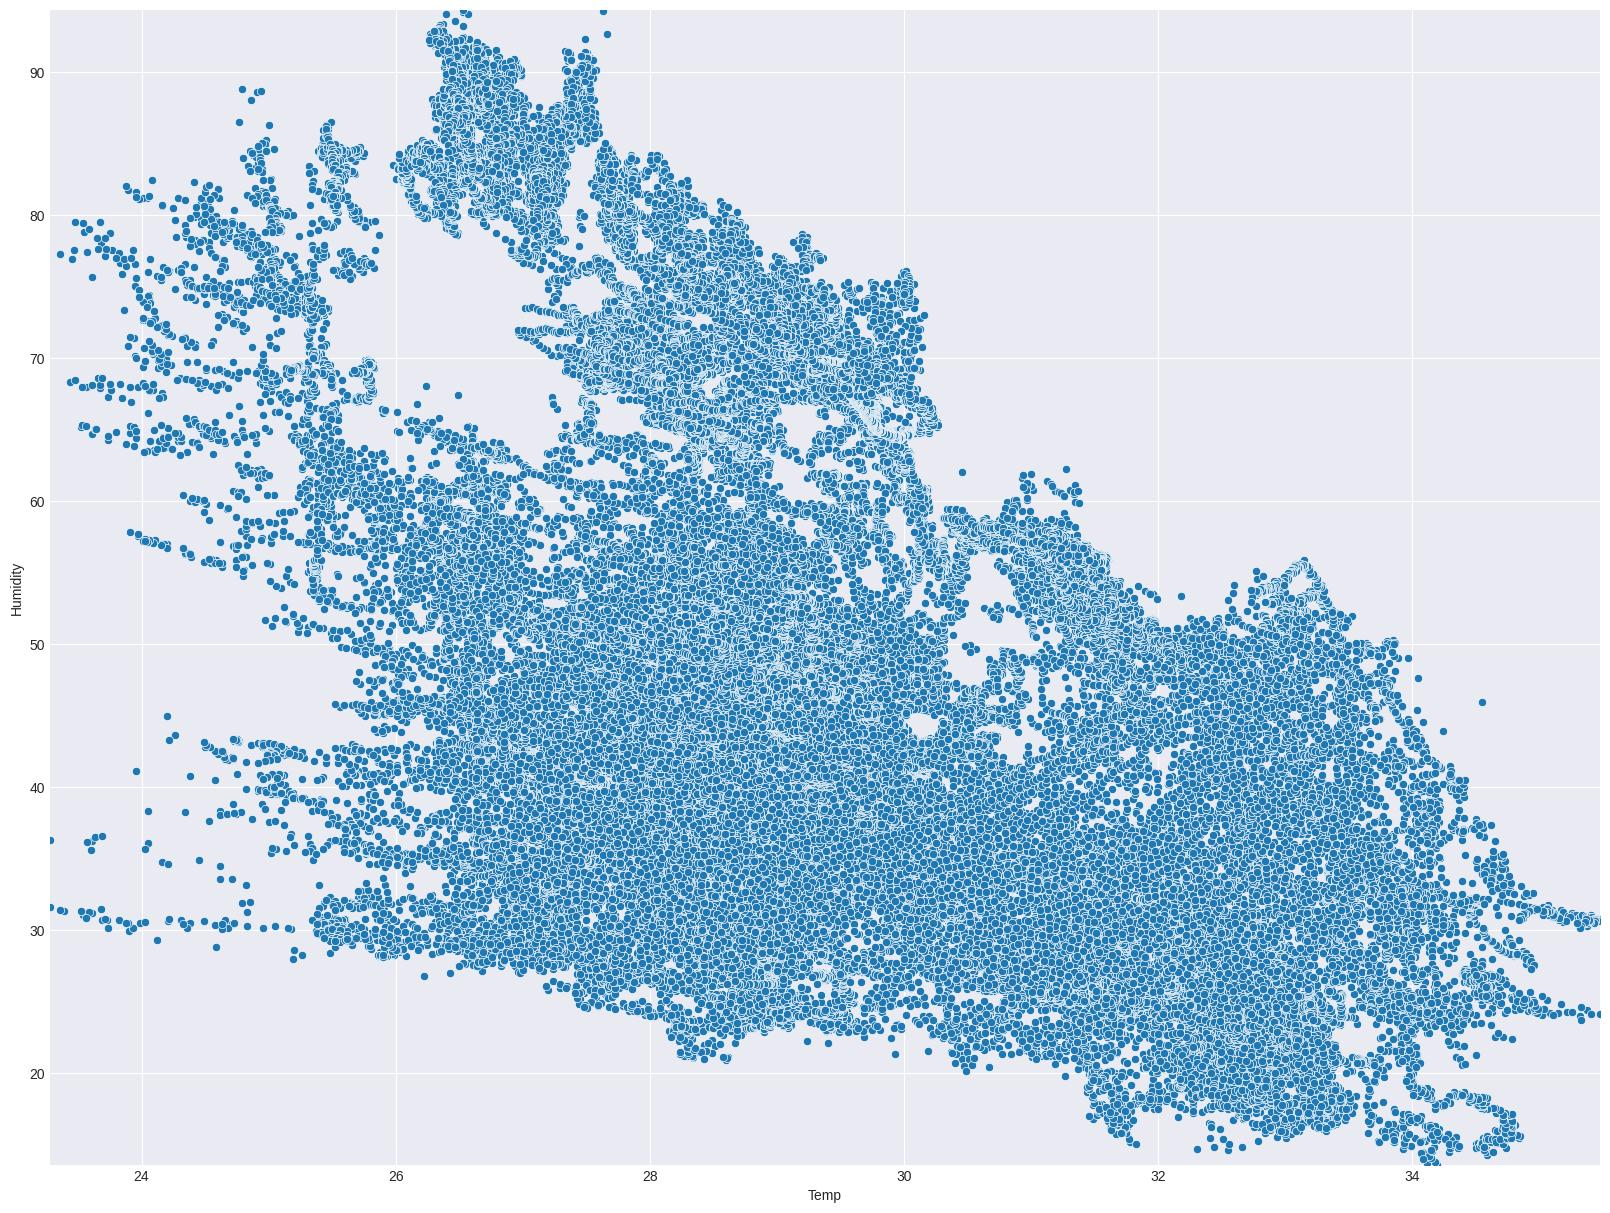

In [36]:
scatterplot(df['Temp'], df['Humidity'])

### Environmental Conditions

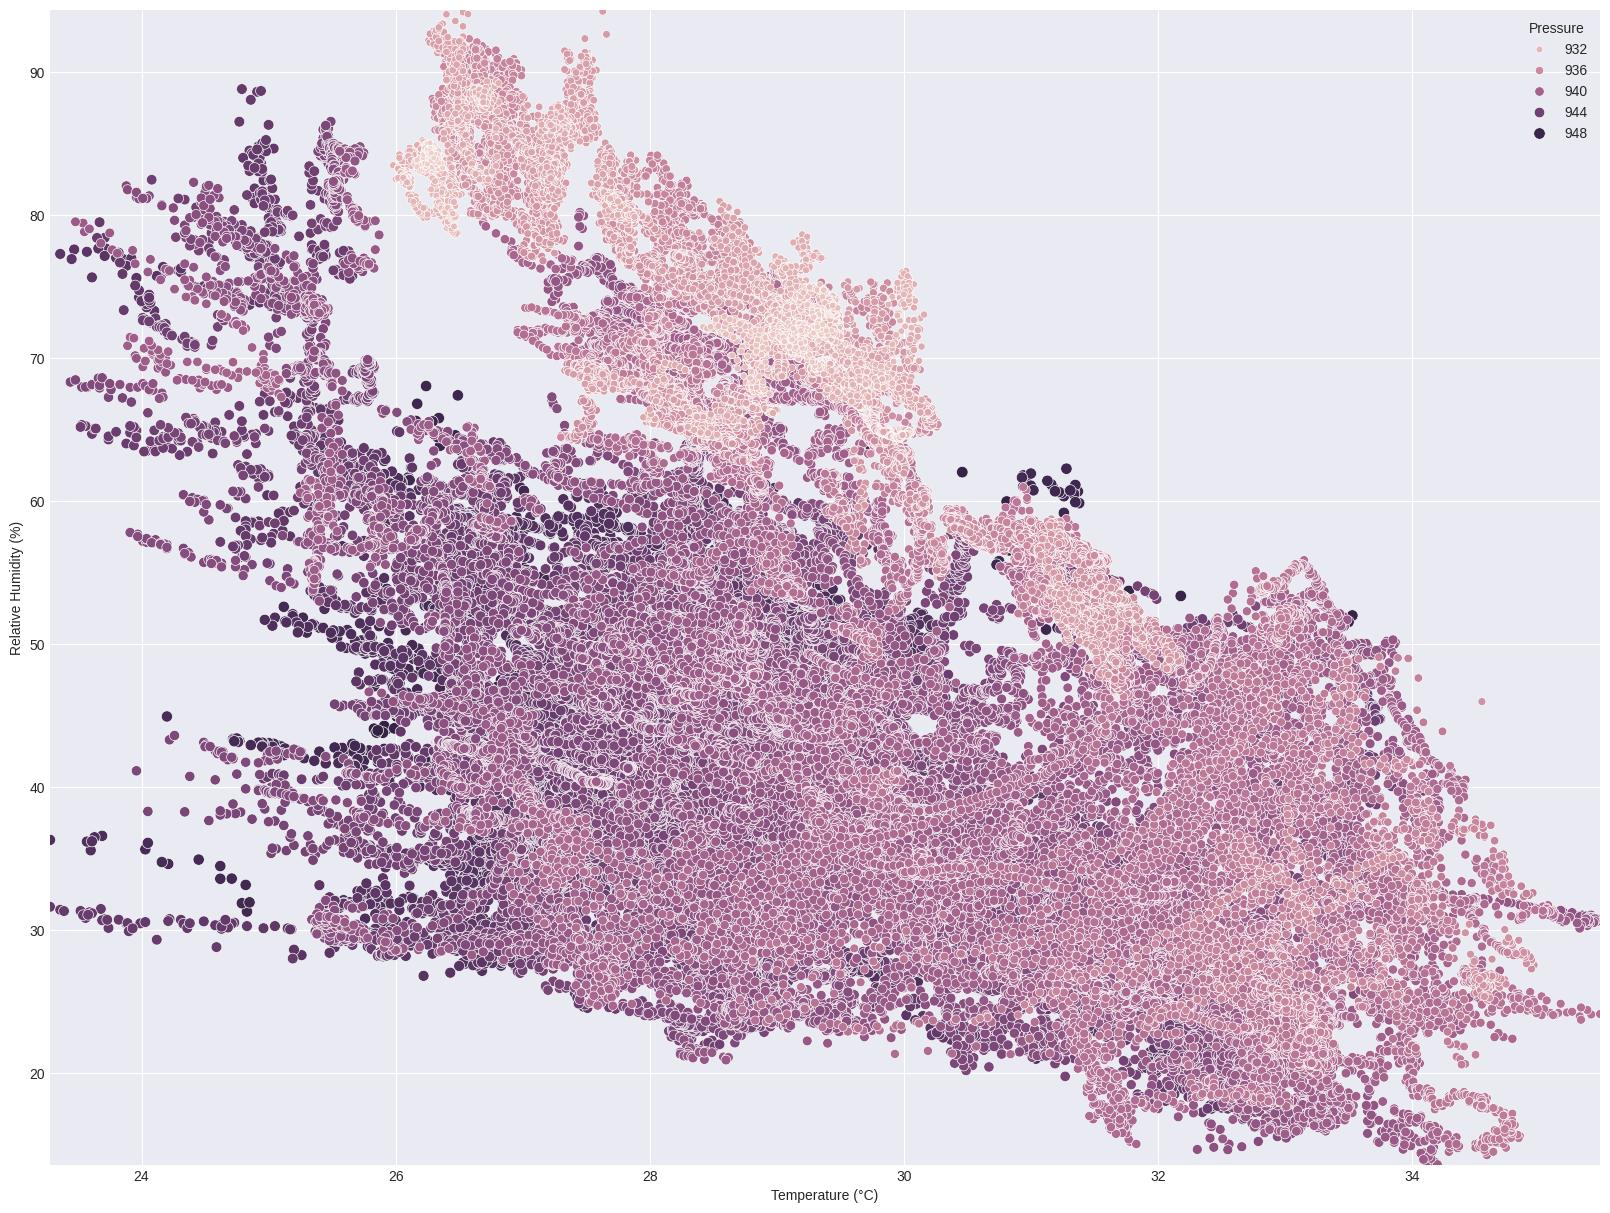

In [38]:
df_sort = df.sort_values(by=['Pressure'], ascending=False)
scatterplot(
    x_feature=df_sort['Temp'],
    y_feature=df_sort['Humidity'],
    hue_feature=df_sort['Pressure'],
    size_feature=df_sort['Pressure'],
    xlabel="Temperature (°C)",
    ylabel="Relative Humidity (%)"
)

### Heatmap

<Axes: title={'center': 'Heatmap of Dataset Features'}>

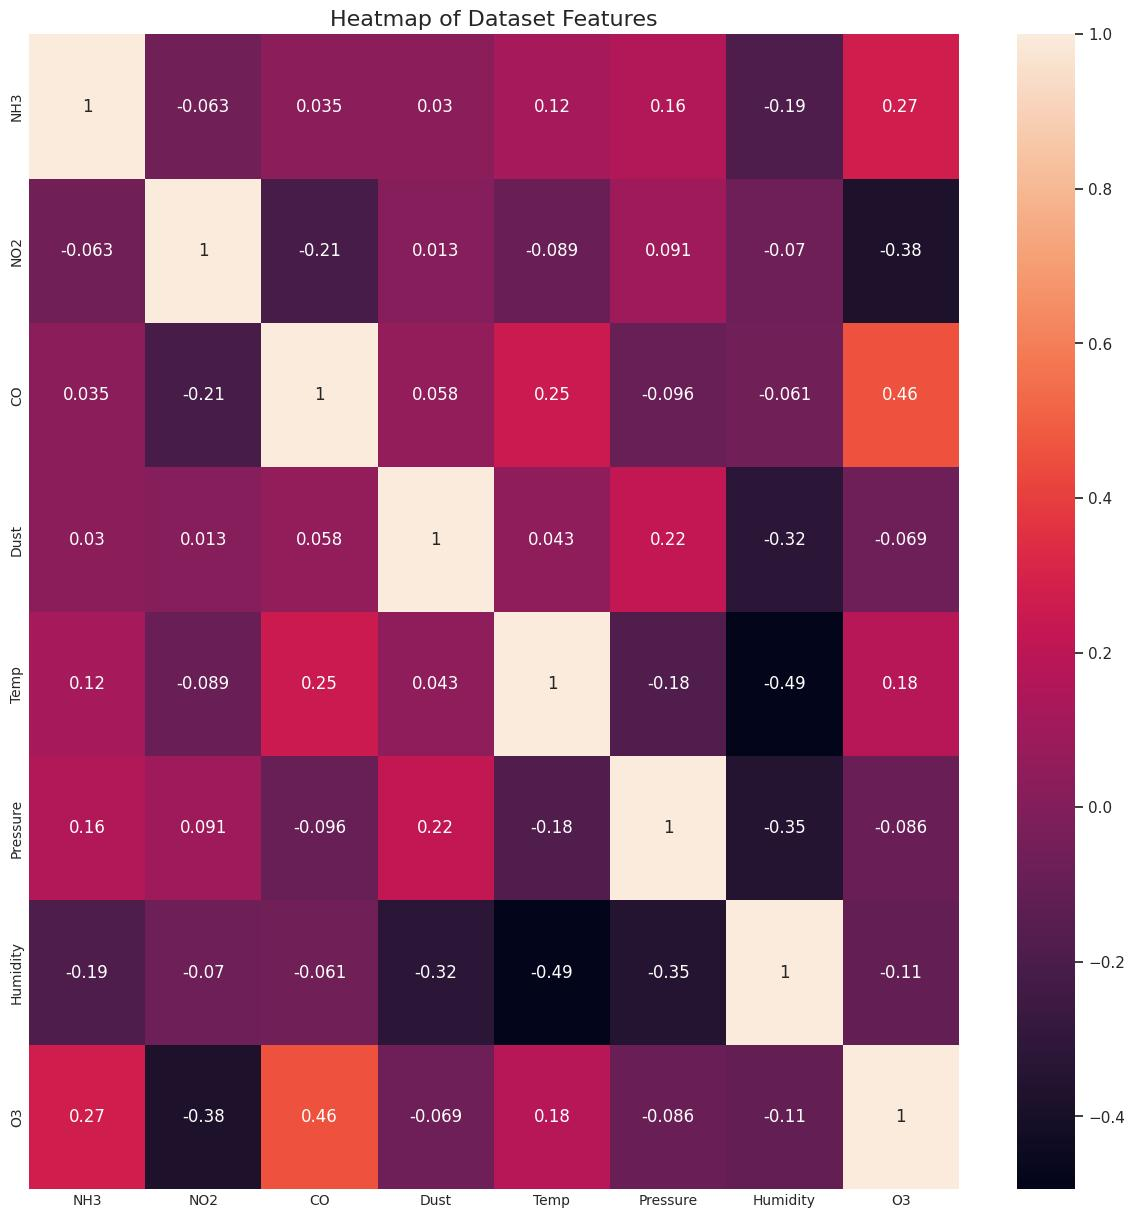

In [40]:
df.drop(columns=['Time'], inplace=True)
corr = df.drop(columns=['Date']).corr('spearman')
plt.figure(figsize=(15,15))
plt.title('Heatmap of Dataset Features', fontsize=16)
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, annot_kws={"size": 12})

### Pairplot

<Figure size 2500x2500 with 0 Axes>

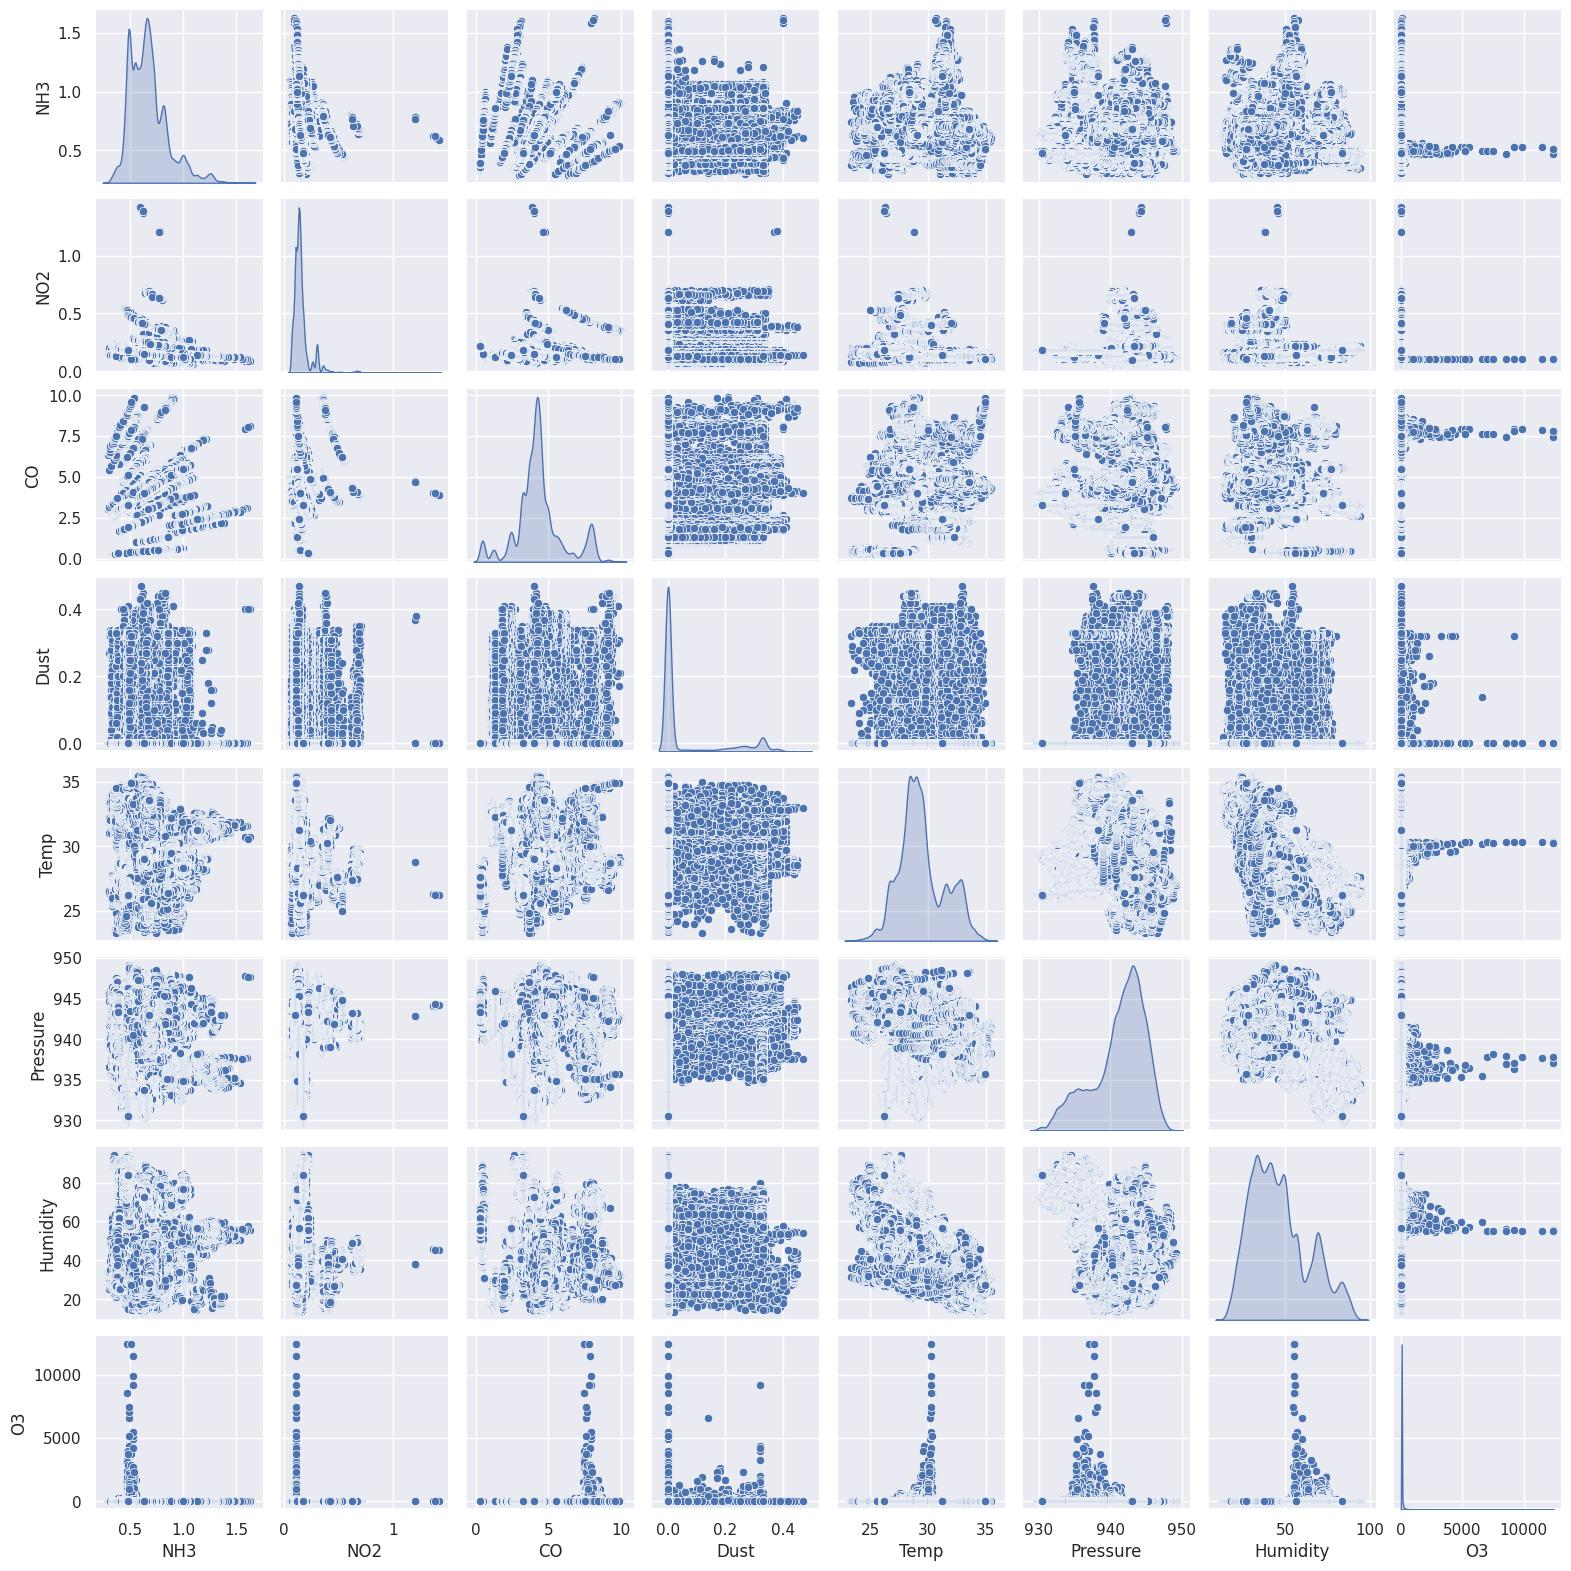

In [41]:
plt.figure(figsize=(25,25))
sns.pairplot(df.drop(
    columns=['Date']),
    height=2,
    diag_kind="kde"
)

## ADF

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
targets = ['NO2', 'NH3', 'CO']
adfrecords = []

for target in targets:
    series = df[target].values
    adfullerresult = adfuller(series)
    result = {
        'Feature': target,
        'ADF Statistic': adfullerresult[0],
        'p-value': adfullerresult[1],
    }

    adfrecords.append(result)

adftable = pd.DataFrame(adfrecords)
adftable

Feature  ADF Statistic       p-value
0     NO2      -7.099119  4.212960e-10
1     NH3      -7.108051  4.005609e-10
2      CO      -5.518857  1.897655e-06

# Data Cleaning

## NA Check

In [44]:
df.isna().sum()

NH3         0
NO2         0
CO          0
Dust        0
Temp        0
Pressure    0
Humidity    0
O3          0
Date        0
dtype: int64

## Drop Unused Feature(s)

In [45]:
df.drop(columns=['Dust'], inplace=True)
df.head()

NH3   NO2    CO   Temp  Pressure  Humidity     O3  \
0  0.60  0.16  4.01  33.53    948.26     51.98   7.37   
1  0.62  0.15  4.13  33.50    948.18     51.53   9.06   
2  0.69  0.14  4.45  33.36    948.15     50.50  16.47   
3  0.70  0.14  4.52  32.18    948.14     53.35   9.80   
4  0.72  0.14  4.56  31.77    948.08     53.70  17.28   

                        Date  
0 2020-11-17 11:20:53.407872  
1 2020-11-17 11:22:41.214724  
2 2020-11-17 11:24:28.546567  
3 2020-11-17 11:26:16.884289  
4 2020-11-17 11:28:19.820781

# Model Training

In [46]:
split_index = int(len(df) * 0.8)

In [47]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

2024-07-20 10:38:06.381237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-20 10:38:06.498339: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 10:38:06.498359: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 10:38:06.499238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-20 10:38:06.558991: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-20 10:38:06.559490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [48]:
X_ = df[:split_index]
y_ = df[split_index:]

In [49]:
def create_sequences(X_in, y_in, sequence_length):
    X, y = [], []
    for i in range(len(X_in) - sequence_length):
        X.append(X_in.iloc[i:i + sequence_length].to_numpy())
        y.append(y_in.iloc[i + sequence_length])
    return np.array(X), np.array(y)

In [81]:
def run_lstm_model(X, X_target, y, y_target, sequence_length):
    X_train, y_train = create_sequences(X, X_target, sequence_length)
    X_test, y_test = create_sequences(y, y_target, sequence_length)

    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, name="layer1"))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False, name="layer2"))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=20, batch_size=64)

    return model.predict(X_test)

In [82]:
results = []
sequence_length = 100
y_trimmed = y_[sequence_length:]

for target in targets:
    y_pred = run_lstm_model(
        X_.drop(columns=([target, 'Date'])),
        X_[target],
        y_.drop(columns=([target, 'Date'])),
        y_[target],
        sequence_length
    )

    result = {
        'Feature': target,
        'RMSE': mean_squared_error(y_trimmed[target], y_pred, squared=False),
        'MAE': mean_absolute_error(y_trimmed[target], y_pred),
        'MAPE': mean_absolute_percentage_error(y_trimmed[target], y_pred),
        'R2': r2_score(y_trimmed[target], y_pred),
        'Mean': df[target].mean(),
        'Result': y_pred
    }

    results.append(result)

evaluation = pd.DataFrame(records)
evaluation

Epoch 1/20
2123/2123 [==============================] - 64s 29ms/step - loss: 0.0492
Epoch 2/20
2123/2123 [==============================] - 62s 29ms/step - loss: 0.0454
Epoch 3/20
2123/2123 [==============================] - 62s 29ms/step - loss: 0.0446
Epoch 4/20
2123/2123 [==============================] - 64s 30ms/step - loss: 0.0442
Epoch 5/20
2123/2123 [==============================] - 61s 29ms/step - loss: 0.0433
Epoch 6/20
2123/2123 [==============================] - 62s 29ms/step - loss: 0.0415
Epoch 7/20
2123/2123 [==============================] - 62s 29ms/step - loss: 0.0411
Epoch 8/20
2123/2123 [==============================] - 63s 30ms/step - loss: 0.0397
Epoch 9/20
2123/2123 [==============================] - 62s 29ms/step - loss: 0.0386
Epoch 10/20
2123/2123 [==============================] - 61s 29ms/step - loss: 0.0359
Epoch 11/20
2123/2123 [==============================] - 61s 29ms/step - loss: 0.0339
Epoch 12/20
2123/2123 [==============================] - 61s 29

Empty DataFrame
Columns: []
Index: []

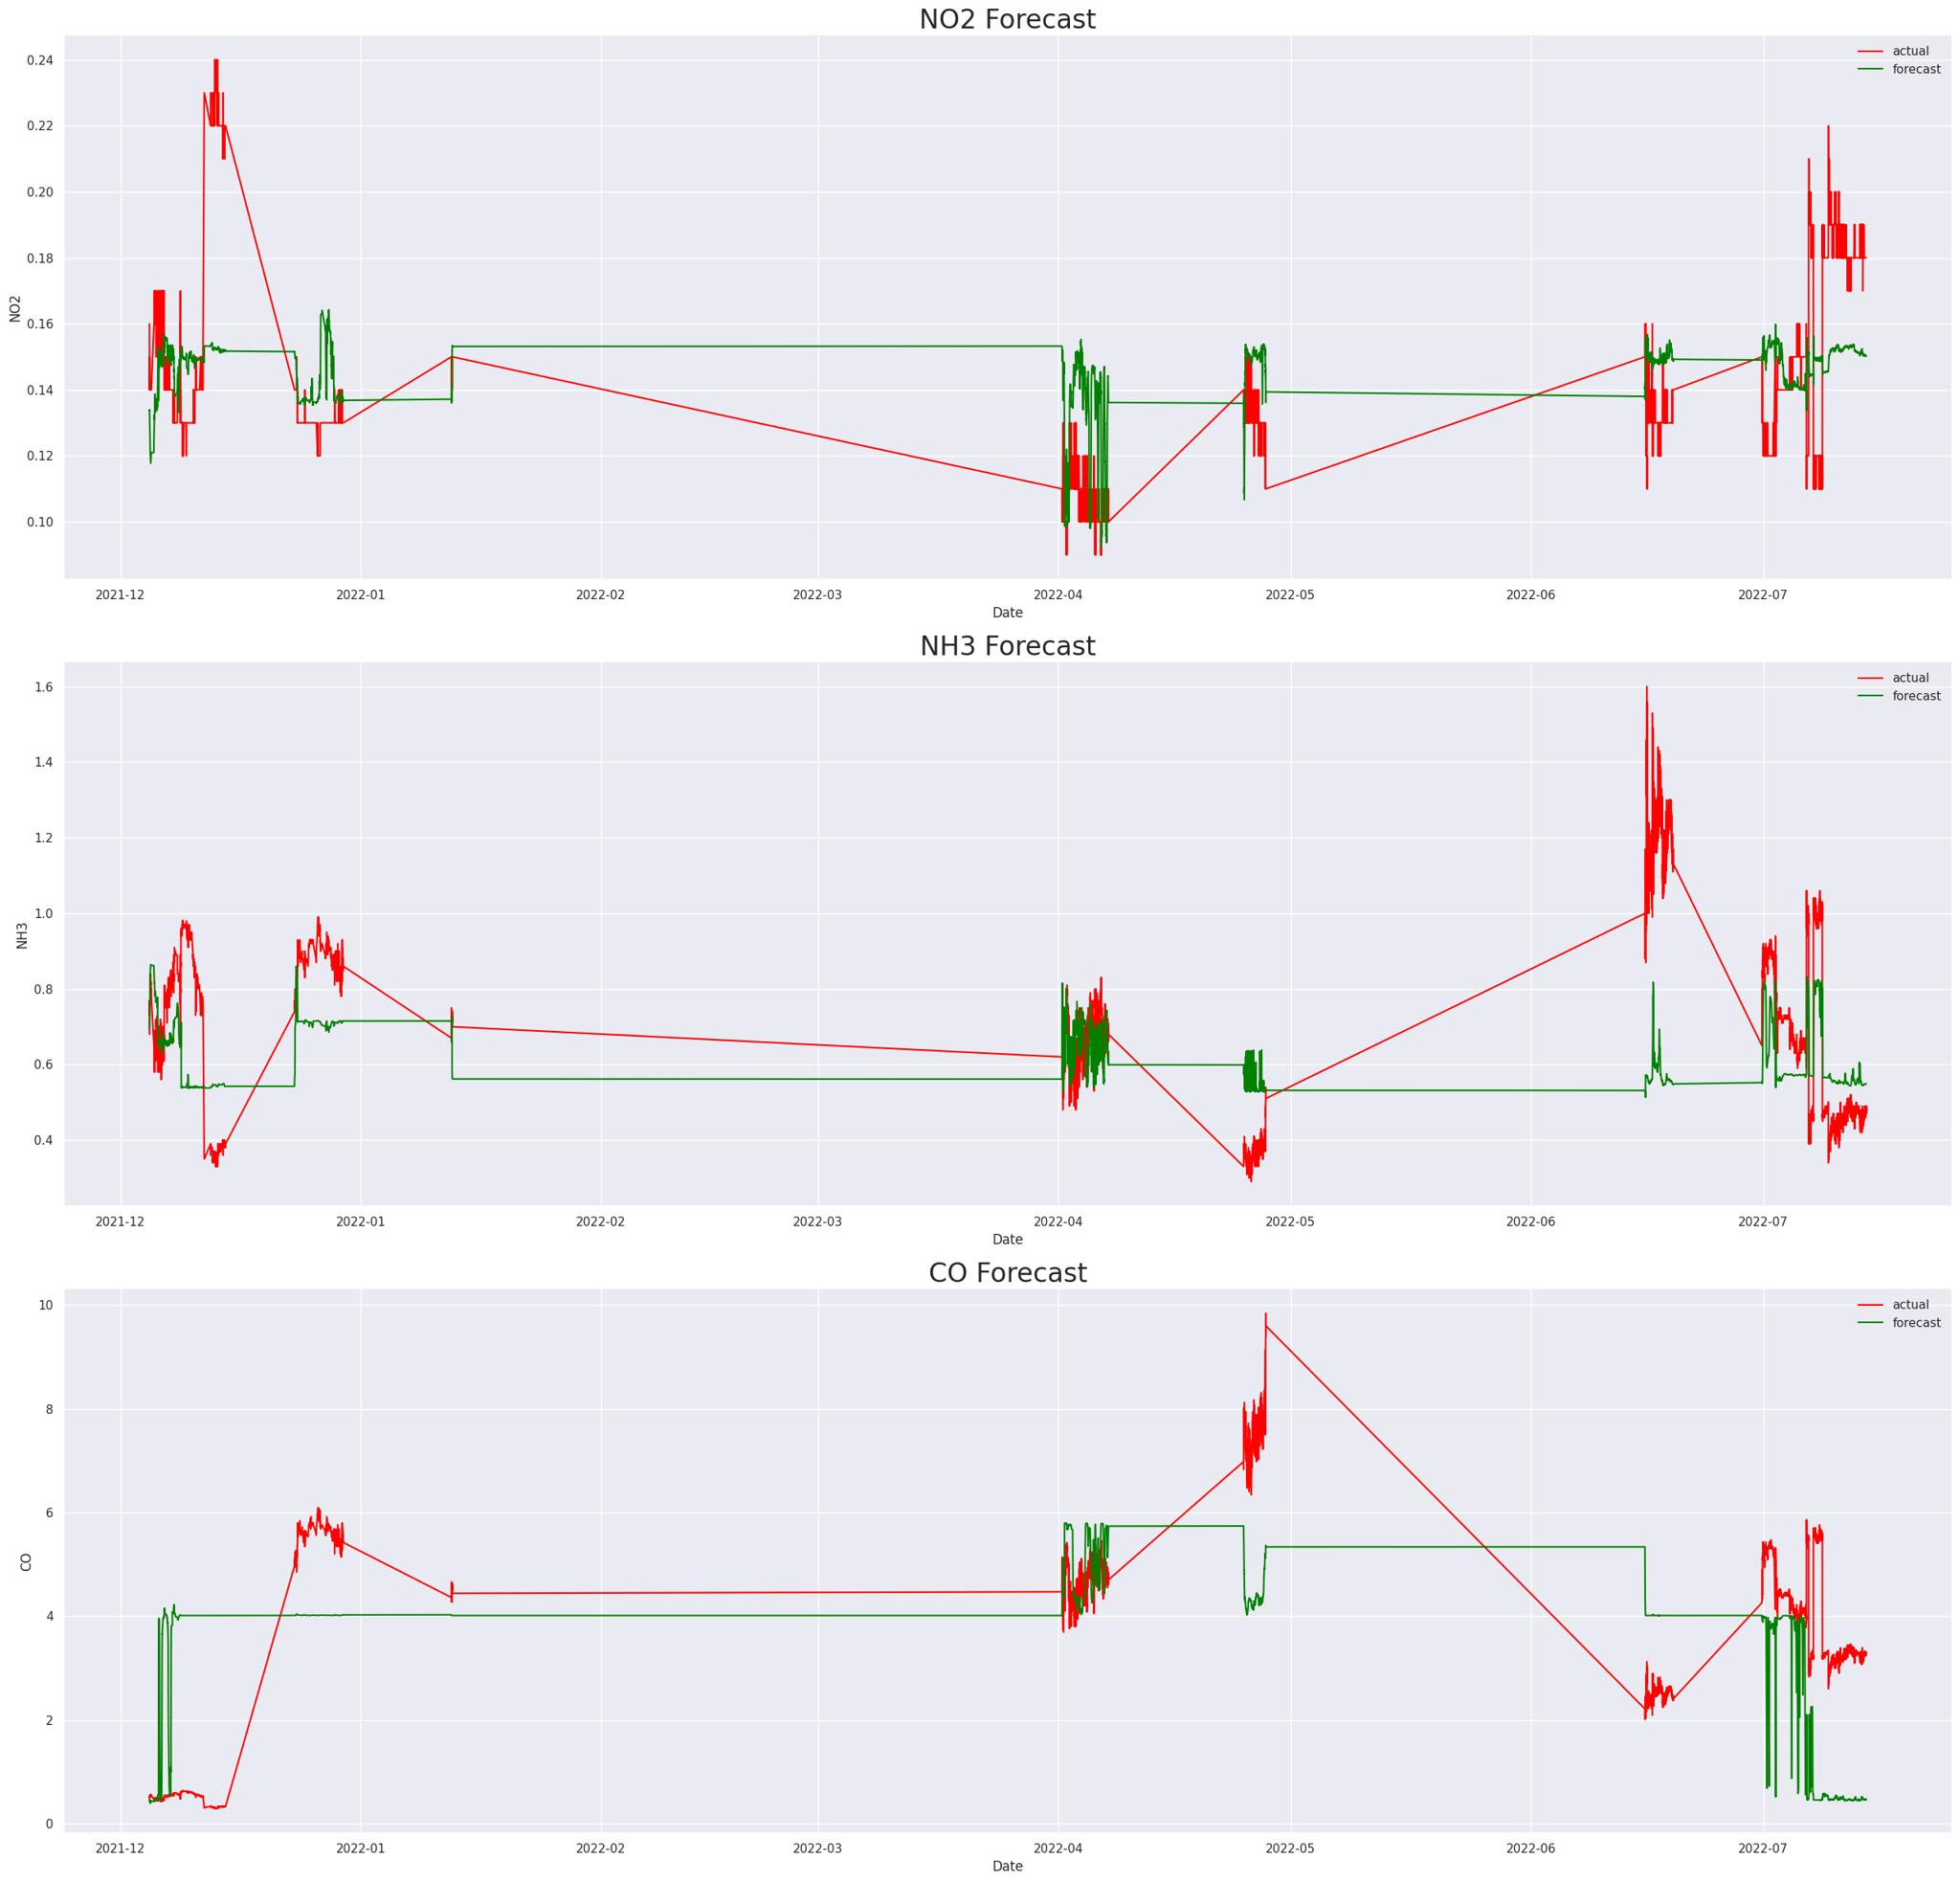

In [83]:
fig, axes = plt.subplots(nrows=len(results), ncols=1, figsize=(25, 8 * len(results)))

for i, res in enumerate(results):
    ax = axes[i]
    ax.plot(y_trimmed['Date'], y_trimmed[res['Feature']], color='red' , label='actual')
    ax.plot(y_trimmed['Date'], res['Result'], color='green', label='forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel(res['Feature'])
    ax.set_title(f'{res["Feature"]} Forecast', fontsize=24)
    ax.legend()

plt.tight_layout()
plt.show()